Project:
    
Business Objective:
    
The fundamental goal here is to model the CO2 emissions as a function of several car engine features.

Data Set Details: 

The file contains the data for this example. Here the number of variables (columns) is 12, and the number of instances (rows) is 7385.

In that way, this problem has the 12 following variables:

make, car brand under study.

model, the specific model of the car.

vehicle_class, car body type of the car.

engine_size, size of the car engine, in Liters.

cylinders, number of cylinders.

transmission, "A" for`Automatic', "AM" for ``Automated manual', "AS" for 'Automatic with select shift', "AV" for 'Continuously 
variable', "M" for 'Manual'.

fuel_type, "X" for 'Regular gasoline', "Z" for 'Premium gasoline', "D" for 'Diesel', "E" for 'Ethanol (E85)', "N" for 'Natural gas'.

fuel_consumption_city, City fuel consumption ratings, in liters per 100 kilometers.

fuel_consumption_hwy, Highway fuel consumption ratings, in liters per 100 kilometers.

fuel_consumption_comb(l/100km), the combined fuel consumption rating (55% city, 45% highway), in L/100 km.

fuel_consumption_comb(mpg), the combined fuel consumption rating (55% city, 45% highway), in miles per gallon (mpg).

co2_emissions, the tailpipe emissions of carbon dioxide for combined city and highway driving, in grams per kilometer.

Acceptance Criterion: Need to deploy the end results using Flask /Streamlit etc


# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Reading Dataset

In [2]:
df=pd.read_csv("co2_emissions.csv")

df

make        model   vehicle_class  engine_size  cylinders transmission  \
0     ACURA          ILX         COMPACT          2.0          4           AS   
1     ACURA          ILX         COMPACT          2.4          4            M   
2     ACURA   ILX HYBRID         COMPACT          1.5          4           AV   
3     ACURA      MDX 4WD     SUV - SMALL          3.5          6           AS   
4     ACURA      RDX AWD     SUV - SMALL          3.5          6           AS   
...     ...          ...             ...          ...        ...          ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL          2.0          4           AS   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL          2.0          4           AS   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL          2.0          4           AS   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD          2.0          4           AS   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD          2.0          4           AS   

     fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0            Z                    9.9                   6.7   
1            Z                   11.2                   7.7   
2            Z                    6.0                   5.8   
3            Z                   12.7                   9.1   
4            Z                   12.1                   8.7   
...        ...                    ...                   ...   
7380         Z                   10.7                   7.7   
7381         Z                   11.2                   8.3   
7382         Z                   11.7                   8.6   
7383         Z                   11.2                   8.3   
7384         Z                   12.2                   8.7   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
0                                8.5                          33   
1                                9.6                          29   
2                                5.9                          48   
3                               11.1                          25   
4                               10.6                          27   
...                              ...                         ...   
7380                             9.4                          30   
7381                             9.9                          29   
7382                            10.3                          27   
7383                             9.9                          29   
7384                            10.7                          26   

      co2_emissions  
0               196  
1               221  
2               136  
3               255  
4               244  
...             ...  
7380            219  
7381            232  
7382            240  
7383            232  
7384            248  

[7385 rows x 12 columns]

# Analysing the Data


In [195]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

In [4]:
df.shape

(7385, 12)

In [5]:
df.head()

make       model vehicle_class  engine_size  cylinders transmission  \
0  ACURA         ILX       COMPACT          2.0          4           AS   
1  ACURA         ILX       COMPACT          2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT          1.5          4           AV   
3  ACURA     MDX 4WD   SUV - SMALL          3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL          3.5          6           AS   

  fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0         Z                    9.9                   6.7   
1         Z                   11.2                   7.7   
2         Z                    6.0                   5.8   
3         Z                   12.7                   9.1   
4         Z                   12.1                   8.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                             8.5                          33            196  
1                             9.6                          29            221  
2                             5.9                          48            136  
3                            11.1                          25            255  
4                            10.6                          27            244

In [6]:
df.tail()

make        model   vehicle_class  engine_size  cylinders transmission  \
7380  VOLVO  XC40 T5 AWD     SUV - SMALL          2.0          4           AS   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL          2.0          4           AS   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL          2.0          4           AS   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD          2.0          4           AS   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD          2.0          4           AS   

     fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
7380         Z                   10.7                   7.7   
7381         Z                   11.2                   8.3   
7382         Z                   11.7                   8.6   
7383         Z                   11.2                   8.3   
7384         Z                   12.2                   8.7   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
7380                             9.4                          30   
7381                             9.9                          29   
7382                            10.3                          27   
7383                             9.9                          29   
7384                            10.7                          26   

      co2_emissions  
7380            219  
7381            232  
7382            240  
7383            232  
7384            248

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [8]:
df["make"].value_counts()

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: make, dtype: int64

In [9]:
df["model"].value_counts()

F-150 FFV 4X4           32
F-150 FFV               32
MUSTANG                 27
FOCUS FFV               24
SONIC                   20
                        ..
AVENTADOR S ROADSTER     1
HURACAN AWD              1
HURACAN SPYDER AWD       1
LS 500                   1
XC40 T4 AWD              1
Name: model, Length: 2053, dtype: int64

In [10]:
df["vehicle_class"].value_counts()

SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: vehicle_class, dtype: int64

In [11]:
df["transmission"].value_counts()

AS    3127
A     1851
M     1185
AM     646
AV     576
Name: transmission, dtype: int64

In [12]:
df["fuel_type"].value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: fuel_type, dtype: int64

In [13]:
df[df.duplicated()]

make       model            vehicle_class  engine_size  \
1075         ACURA     RDX AWD              SUV - SMALL          3.5   
1076         ACURA         RLX                 MID-SIZE          3.5   
1081    ALFA ROMEO          4C               TWO-SEATER          1.8   
1082  ASTON MARTIN         DB9              MINICOMPACT          5.9   
1084  ASTON MARTIN  V8 VANTAGE               TWO-SEATER          4.7   
...            ...         ...                      ...          ...   
7356        TOYOTA      Tundra  PICKUP TRUCK - STANDARD          5.7   
7365    VOLKSWAGEN    Golf GTI                  COMPACT          2.0   
7366    VOLKSWAGEN       Jetta                  COMPACT          1.4   
7367    VOLKSWAGEN       Jetta                  COMPACT          1.4   
7368    VOLKSWAGEN   Jetta GLI                  COMPACT          2.0   

      cylinders transmission fuel_type  fuel_consumption_city  \
1075          6           AS         Z                   12.1   
1076          6           AS         Z                   11.9   
1081          4           AM         Z                    9.7   
1082         12            A         Z                   18.0   
1084          8           AM         Z                   17.4   
...         ...          ...       ...                    ...   
7356          8           AS         X                   17.7   
7365          4            M         X                    9.8   
7366          4           AS         X                    7.8   
7367          4            M         X                    7.9   
7368          4           AM         X                    9.3   

      fuel_consumption_hwy  fuel_consumption_comb(l/100km)  \
1075                   8.7                            10.6   
1076                   7.7                            10.0   
1081                   6.9                             8.4   
1082                  12.6                            15.6   
1084                  11.3                            14.7   
...                    ...                             ...   
7356                  13.6                            15.9   
7365                   7.3                             8.7   
7366                   5.9                             7.0   
7367                   5.9                             7.0   
7368                   7.2                             8.4   

      fuel_consumption_comb(mpg)  co2_emissions  
1075                          27            244  
1076                          28            230  
1081                          34            193  
1082                          18            359  
1084                          19            338  
...                          ...            ...  
7356                          18            371  
7365                          32            203  
7366                          40            162  
7367                          40            163  
7368                          34            196  

[1112 rows x 12 columns]

In [14]:
df[df.duplicated()].shape

(1112, 12)

In [15]:
df.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

# Data Reduction

In [16]:
# Dropping natural gas from fuel_type column as there is only one data we have which would not make much difference in modelling

df1= df[df['fuel_type']== 'N']

ind = df1.index

df1

make             model vehicle_class  engine_size  cylinders  \
2439  CHEVROLET  IMPALA DUAL FUEL      MID-SIZE          3.6          6   

     transmission fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
2439           AS         N                   15.2                   9.5   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
2439                            12.7                          22   

      co2_emissions  
2439            213

In [17]:
for i in ind:
    df.drop(i, axis=0, inplace=True) 

In [18]:
df["fuel_type"].value_counts()

X    3637
Z    3202
E     370
D     175
Name: fuel_type, dtype: int64

# Feature Engineering

In [19]:
df.head()

make       model vehicle_class  engine_size  cylinders transmission  \
0  ACURA         ILX       COMPACT          2.0          4           AS   
1  ACURA         ILX       COMPACT          2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT          1.5          4           AV   
3  ACURA     MDX 4WD   SUV - SMALL          3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL          3.5          6           AS   

  fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0         Z                    9.9                   6.7   
1         Z                   11.2                   7.7   
2         Z                    6.0                   5.8   
3         Z                   12.7                   9.1   
4         Z                   12.1                   8.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                             8.5                          33            196  
1                             9.6                          29            221  
2                             5.9                          48            136  
3                            11.1                          25            255  
4                            10.6                          27            244

# Data Cleaning

In [20]:
# renaming columns (D,E,X,Z,A,AM,AS,AV,M)
df.rename(columns={"D":"Diesel","E":"Ethanol","X":"Regular_gasoline","Z":"Premium_gasoline","A":"Automatic","AM":"Automated_manual","AS":"Automatic_with_select_shift","AV":"Continuously_variable","M":"Manual"},inplace=True)
df.head(2)

make model vehicle_class  engine_size  cylinders transmission fuel_type  \
0  ACURA   ILX       COMPACT          2.0          4           AS         Z   
1  ACURA   ILX       COMPACT          2.4          4            M         Z   

   fuel_consumption_city  fuel_consumption_hwy  \
0                    9.9                   6.7   
1                   11.2                   7.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                             8.5                          33            196  
1                             9.6                          29            221

# Exploratory Data Analysis

# Statistics Summary

In [21]:
df['fuel_type'].value_counts()

X    3637
Z    3202
E     370
D     175
Name: fuel_type, dtype: int64

In [22]:
df.describe()

engine_size    cylinders  fuel_consumption_city  fuel_consumption_hwy  \
count  7384.000000  7384.000000            7384.000000           7384.000000   
mean      3.160008     5.614978              12.556176              9.041644   
std       1.354252     1.828425               3.500376              2.224601   
min       0.900000     3.000000               4.200000              4.000000   
25%       2.000000     4.000000              10.100000              7.500000   
50%       3.000000     6.000000              12.100000              8.700000   
75%       3.700000     6.000000              14.600000             10.200000   
max       8.400000    16.000000              30.600000             20.600000   

       fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
count                     7384.000000                 7384.000000   
mean                        10.974837                   27.482394   
std                          2.892633                    7.232088   
min                          4.100000                   11.000000   
25%                          8.900000                   22.000000   
50%                         10.600000                   27.000000   
75%                         12.600000                   32.000000   
max                         26.100000                   69.000000   

       co2_emissions  
count    7384.000000  
mean      250.589789  
std        58.515007  
min        96.000000  
25%       208.000000  
50%       246.000000  
75%       288.000000  
max       522.000000

In [23]:
df.corr()

engine_size  cylinders  fuel_consumption_city  \
engine_size                        1.000000   0.927653               0.831384   
cylinders                          0.927653   1.000000               0.800714   
fuel_consumption_city              0.831384   0.800714               1.000000   
fuel_consumption_hwy               0.761525   0.715250               0.948198   
fuel_consumption_comb(l/100km)     0.817059   0.780538               0.993811   
fuel_consumption_comb(mpg)        -0.757855  -0.719329              -0.927053   
co2_emissions                      0.851203   0.832688               0.919719   

                                fuel_consumption_hwy  \
engine_size                                 0.761525   
cylinders                                   0.715250   
fuel_consumption_city                       0.948198   
fuel_consumption_hwy                        1.000000   
fuel_consumption_comb(l/100km)              0.977309   
fuel_consumption_comb(mpg)                 -0.890654   
co2_emissions                               0.883581   

                                fuel_consumption_comb(l/100km)  \
engine_size                                           0.817059   
cylinders                                             0.780538   
fuel_consumption_city                                 0.993811   
fuel_consumption_hwy                                  0.977309   
fuel_consumption_comb(l/100km)                        1.000000   
fuel_consumption_comb(mpg)                           -0.925573   
co2_emissions                                         0.918151   

                                fuel_consumption_comb(mpg)  co2_emissions  
engine_size                                      -0.757855       0.851203  
cylinders                                        -0.719329       0.832688  
fuel_consumption_city                            -0.927053       0.919719  
fuel_consumption_hwy                             -0.890654       0.883581  
fuel_consumption_comb(l/100km)                   -0.925573       0.918151  
fuel_consumption_comb(mpg)                        1.000000      -0.907553  
co2_emissions                                    -0.907553       1.000000

In [24]:
# Before we do EDA, let's separate Categorical & Numerical variables for easy analysis
df2=pd.read_csv("co2_emissions.csv")

In [25]:
cat_colms=df2.select_dtypes(include=["object"]).columns

num_colms=df2.select_dtypes(include=np.number).columns.tolist()

print("Categorical Variables:",cat_colms)

print("Numerical Variables:",num_colms)

Categorical Variables: Index(['make', 'model', 'vehicle_class', 'transmission', 'fuel_type'], dtype='object')
Numerical Variables: ['engine_size', 'cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)', 'co2_emissions']


# EDA (Univariate Analysis)


engine_size
skew: 0.81


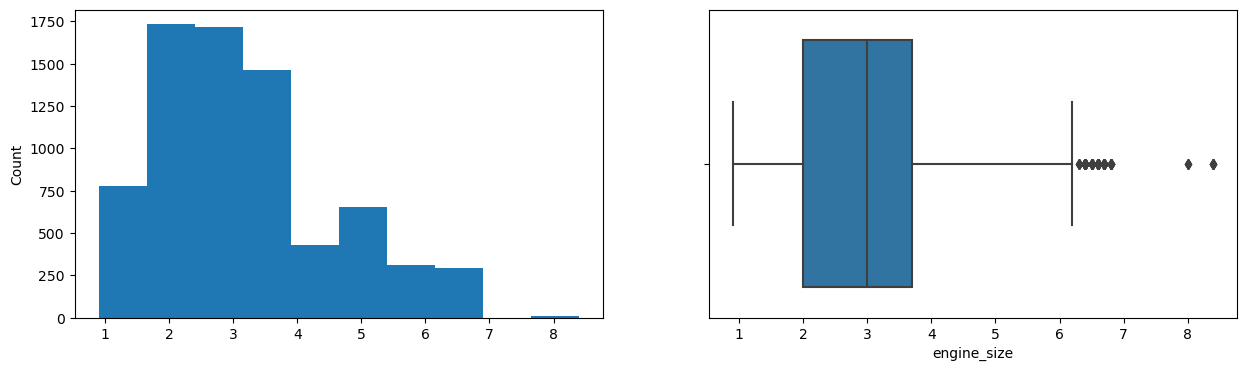

cylinders
skew: 1.11


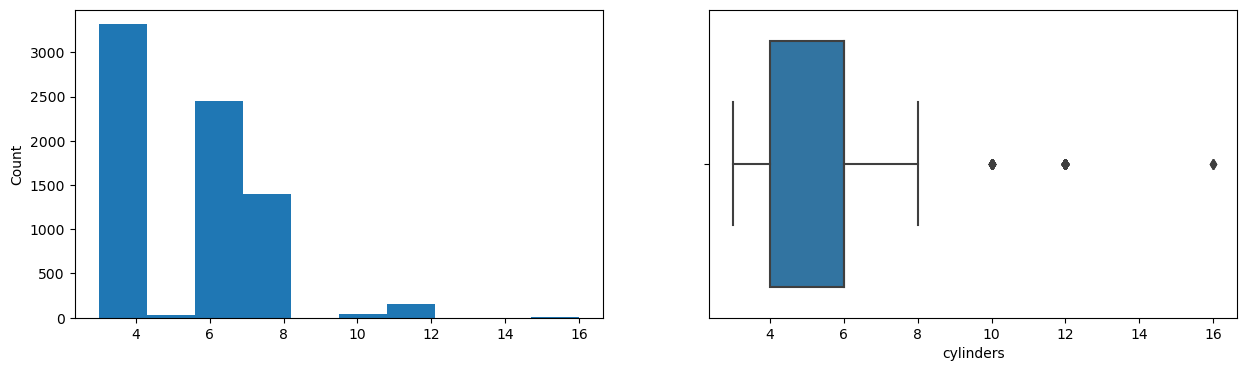

fuel_consumption_city
skew: 0.81


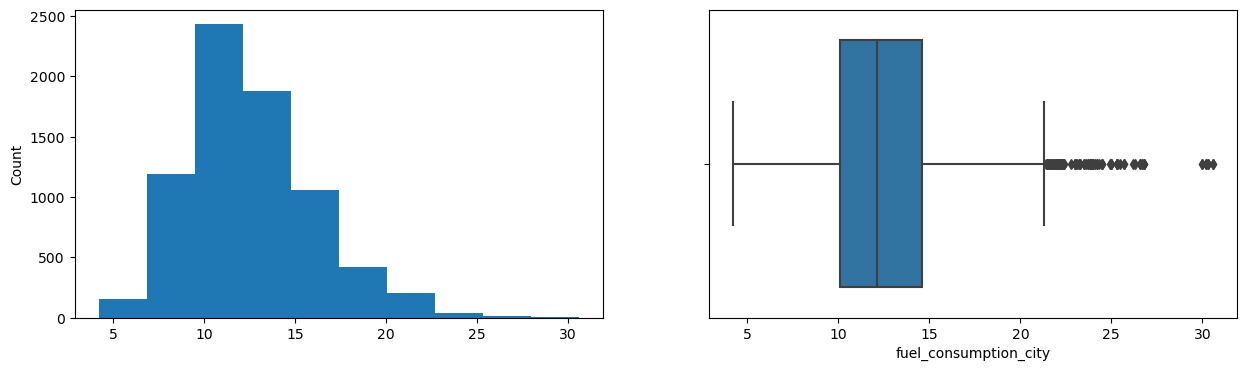

fuel_consumption_hwy
skew: 1.08


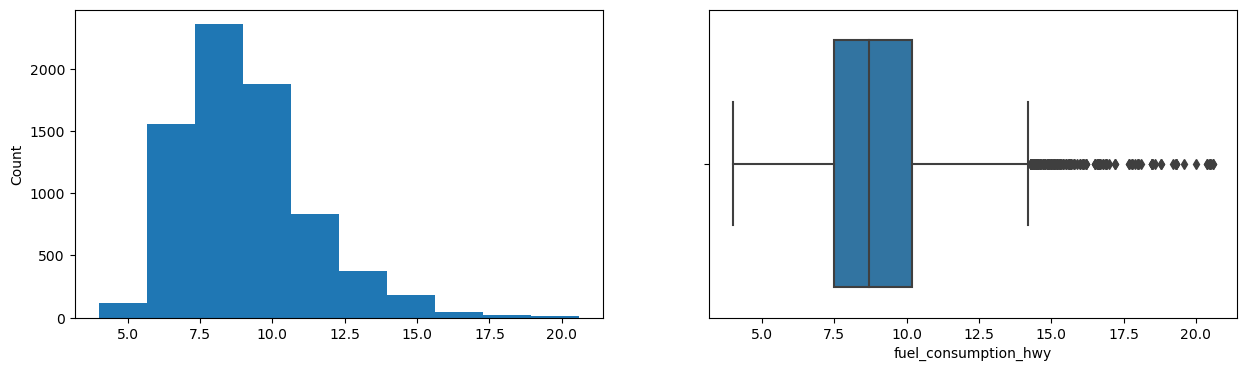

fuel_consumption_comb(l/100km)
skew: 0.89


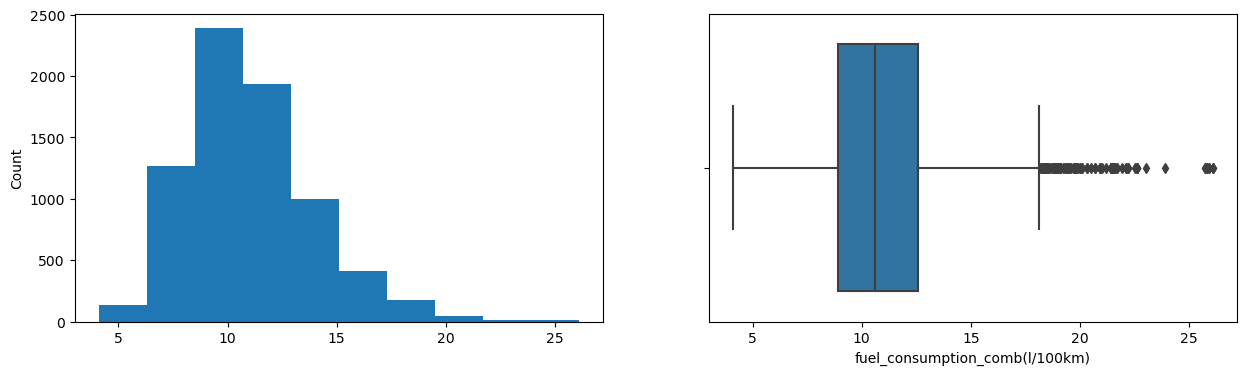

fuel_consumption_comb(mpg)
skew: 0.98


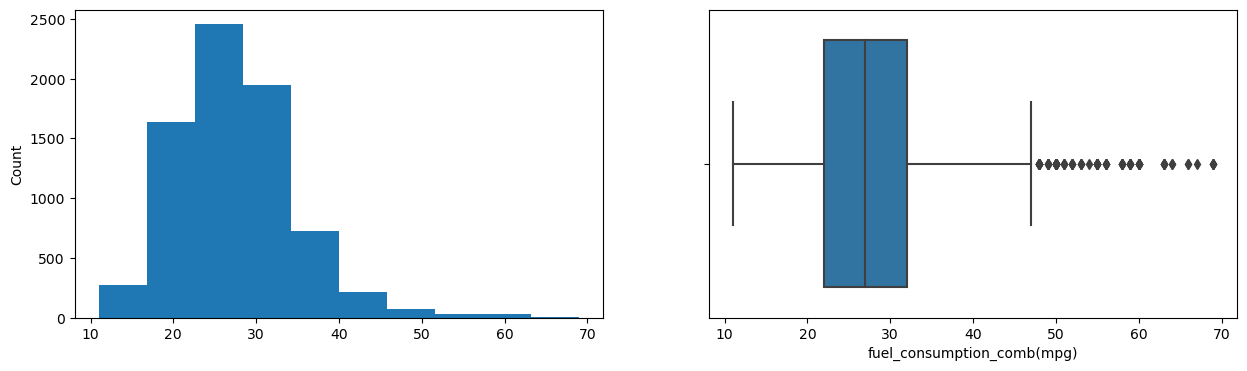

co2_emissions
skew: 0.53


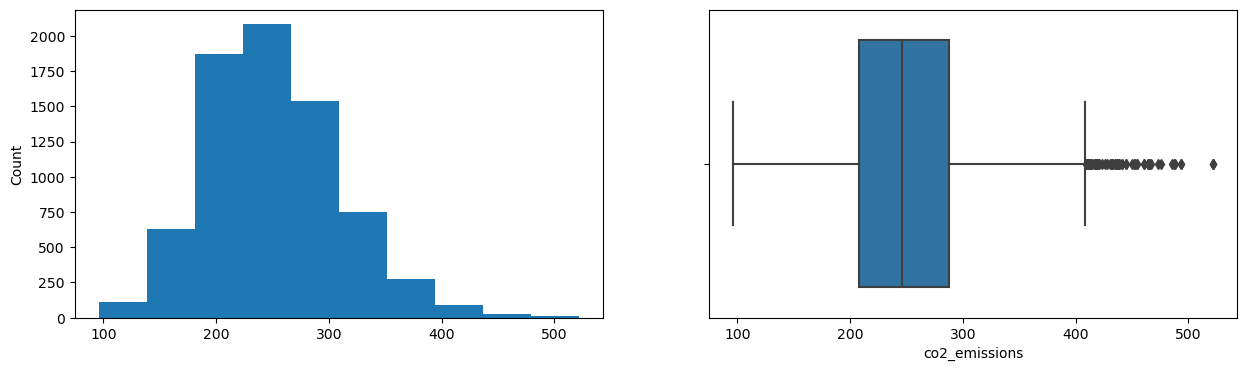

In [26]:
for col in num_colms:
    print(col)
    print("skew:",round(df2[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df2[col].hist(grid=False)
    plt.ylabel("Count")
    plt.subplot(1,2,2)
    sns.boxplot(x=df2[col])
    plt.show()

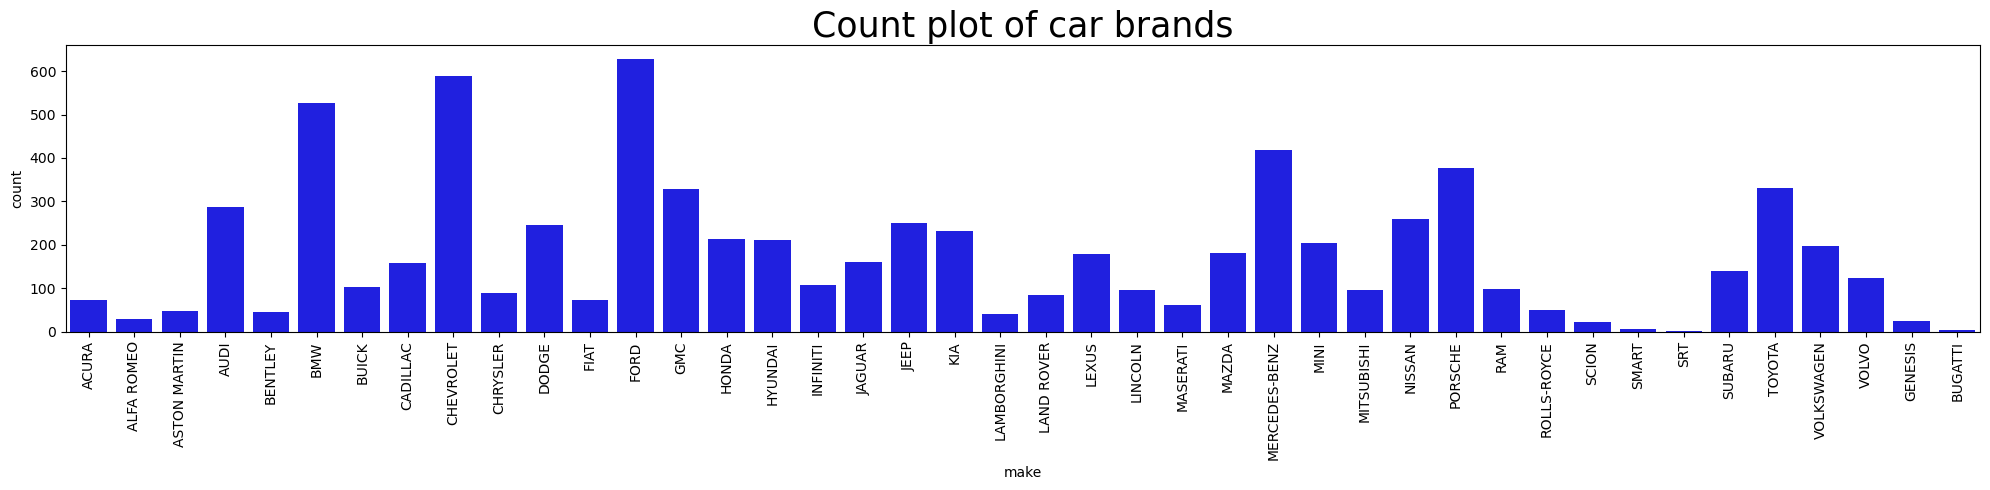

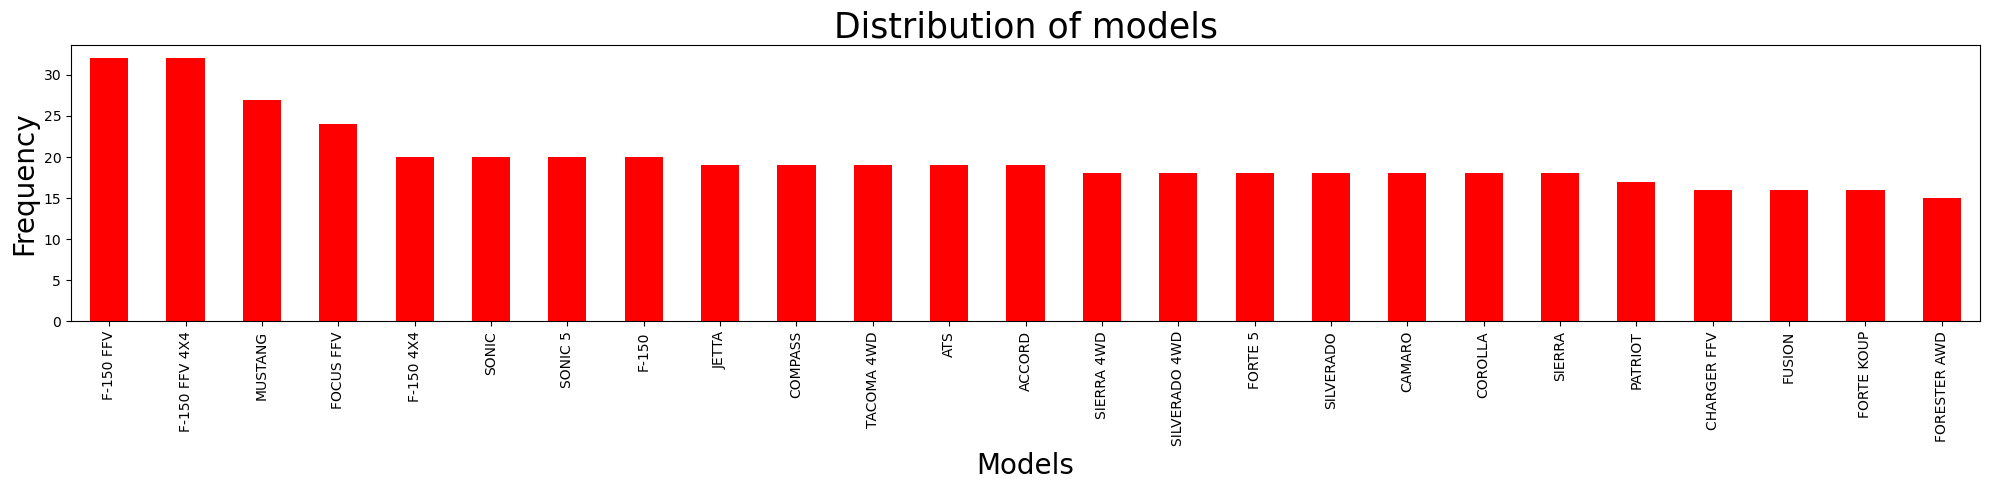

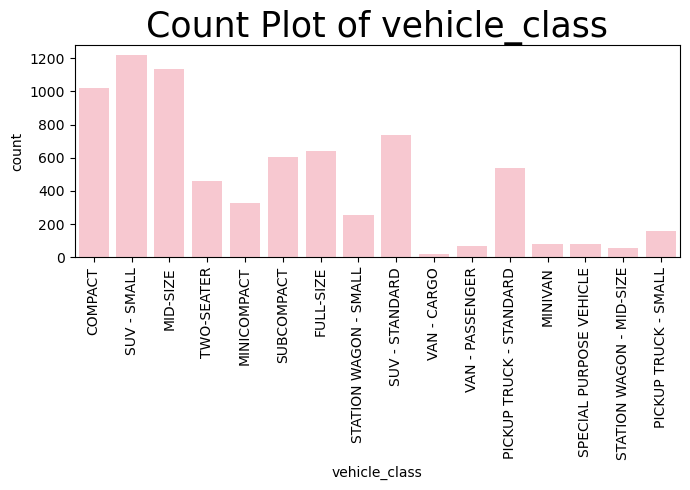

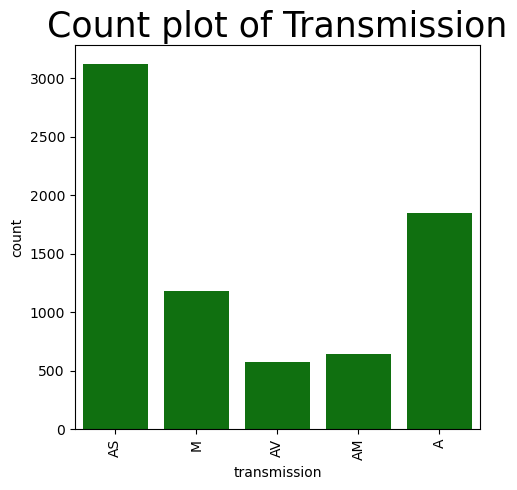

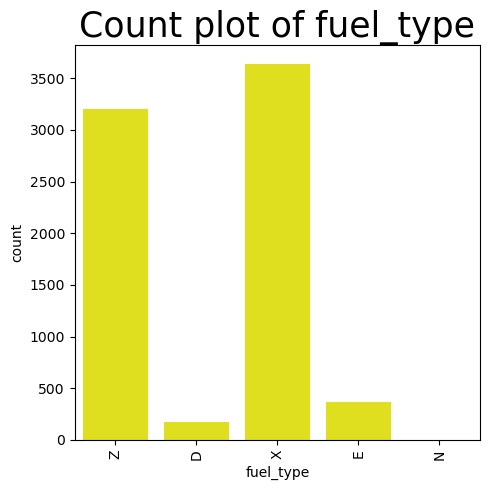

In [27]:
plt.figure(figsize=(20,5))
fig = sns.countplot(x=df2["make"],color="blue")
plt.title('Count plot of car brands', fontsize=25)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90,fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,5))
plt.title('Distribution of models', fontsize=25)
df2.groupby('model')['model'].count().sort_values(ascending=False)[:25].plot(kind='bar',color="red")
plt.xlabel('Models', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.title('Count Plot of vehicle_class', fontsize=25)
fig = sns.countplot(x=df2["vehicle_class"],color="pink")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90,fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,5))
plt.title('Count plot of Transmission', fontsize=25)
fig = sns.countplot(x=df2["transmission"],color="green")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90,fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,5))
plt.title('Count plot of fuel_type', fontsize=25)
fig = sns.countplot(x=df2["fuel_type"],color="yellow")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90,fontsize=10)
plt.tight_layout()
plt.show()


# EDA (Bivariate Analysis)

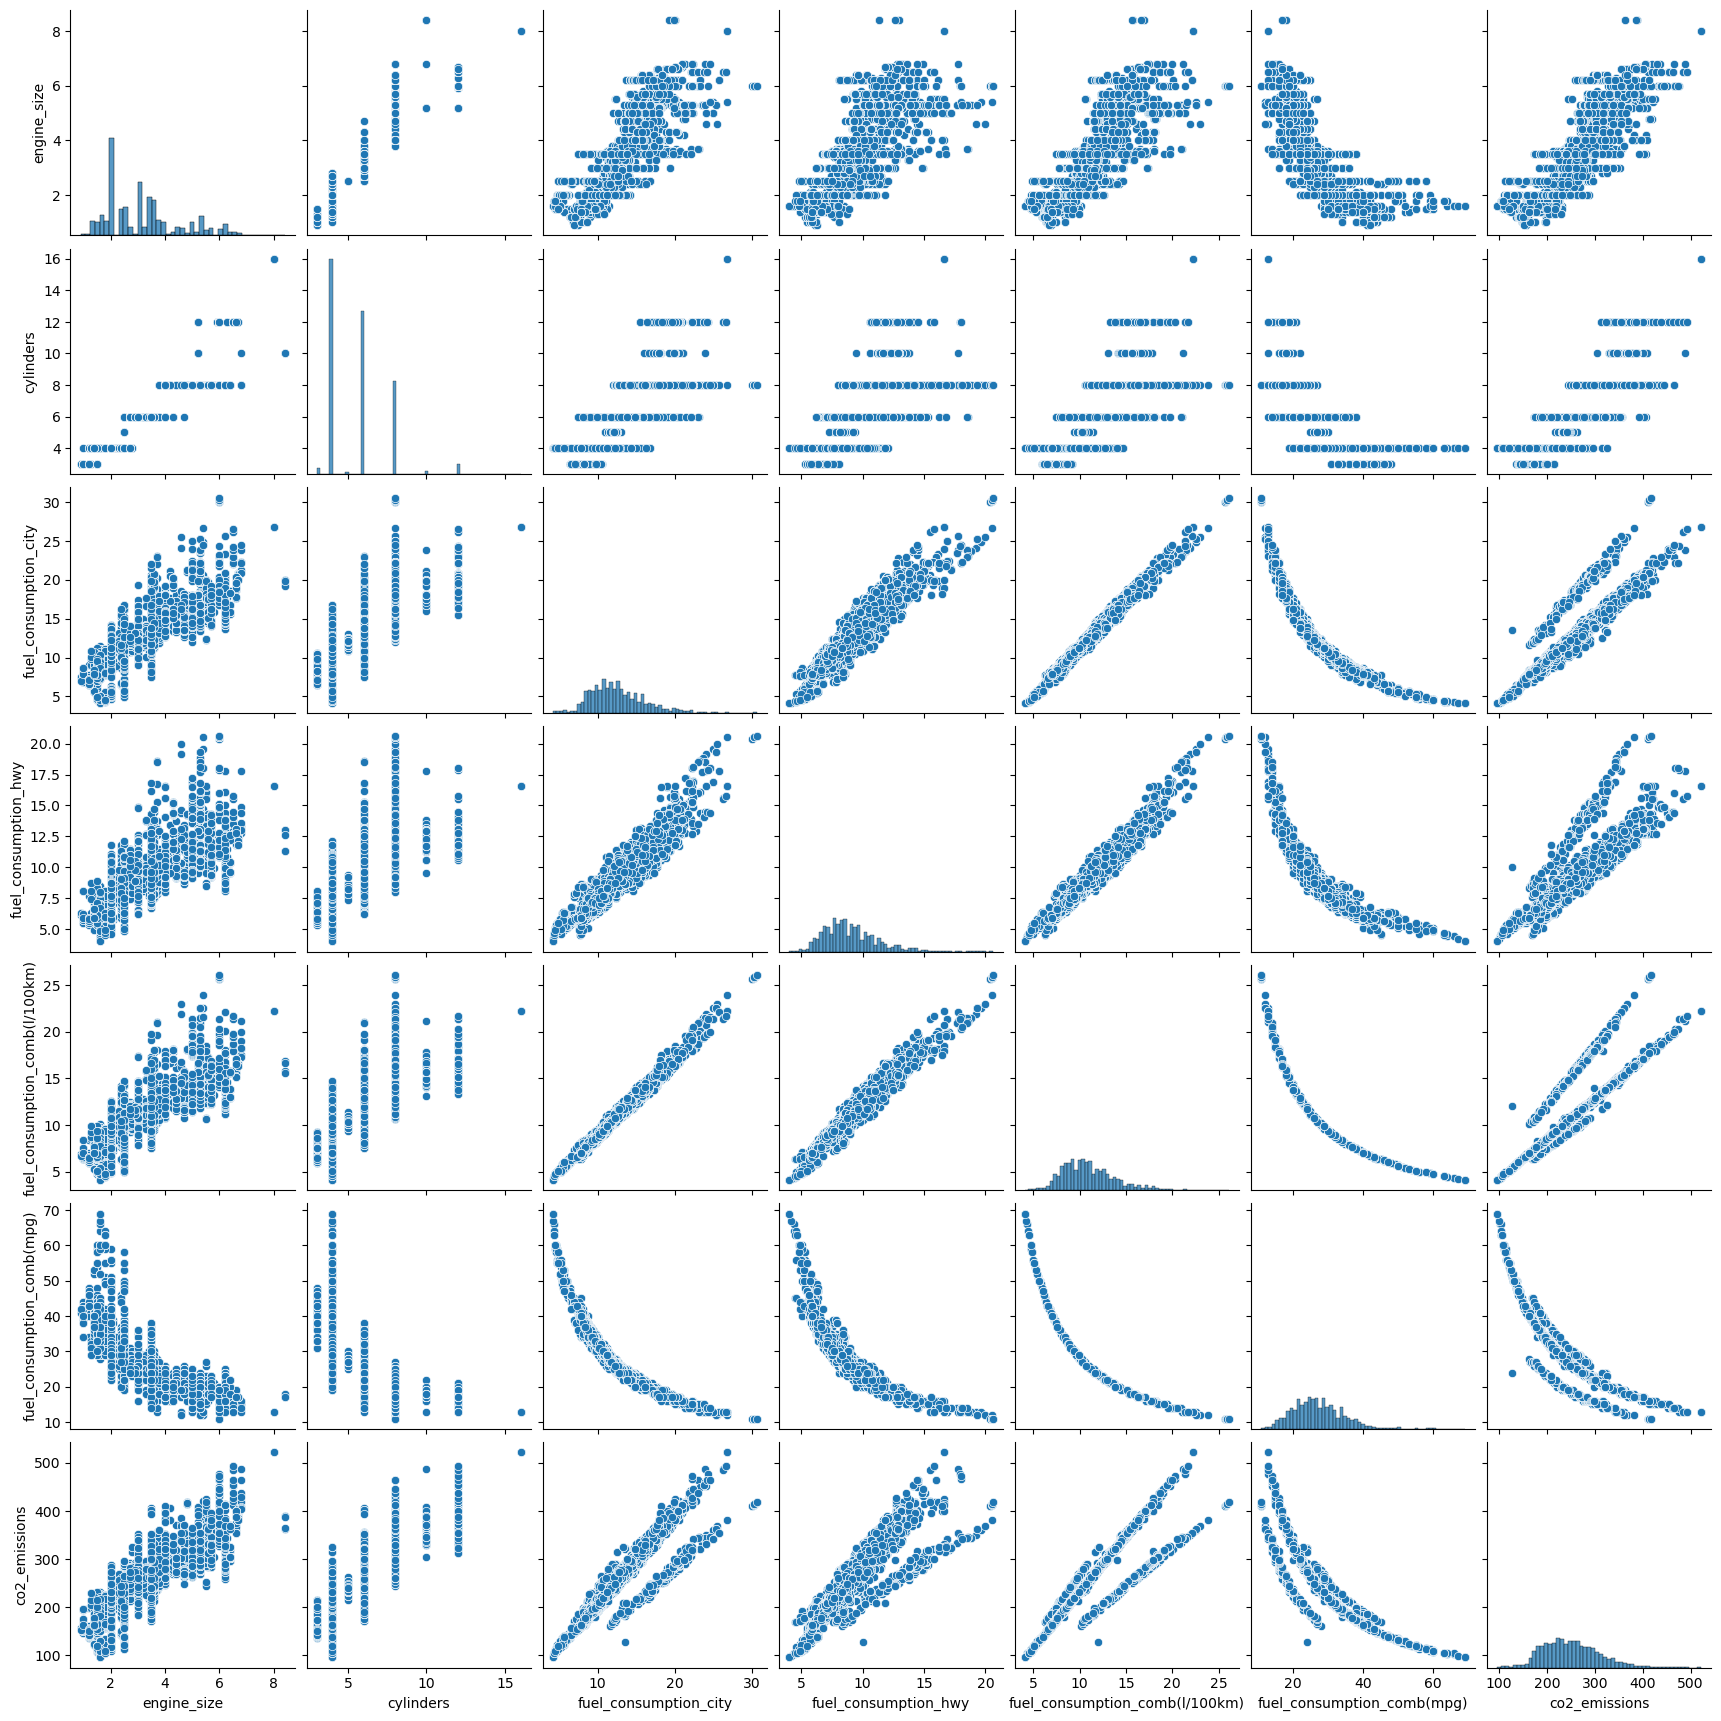

In [28]:
sns.pairplot(df2)
plt.show()

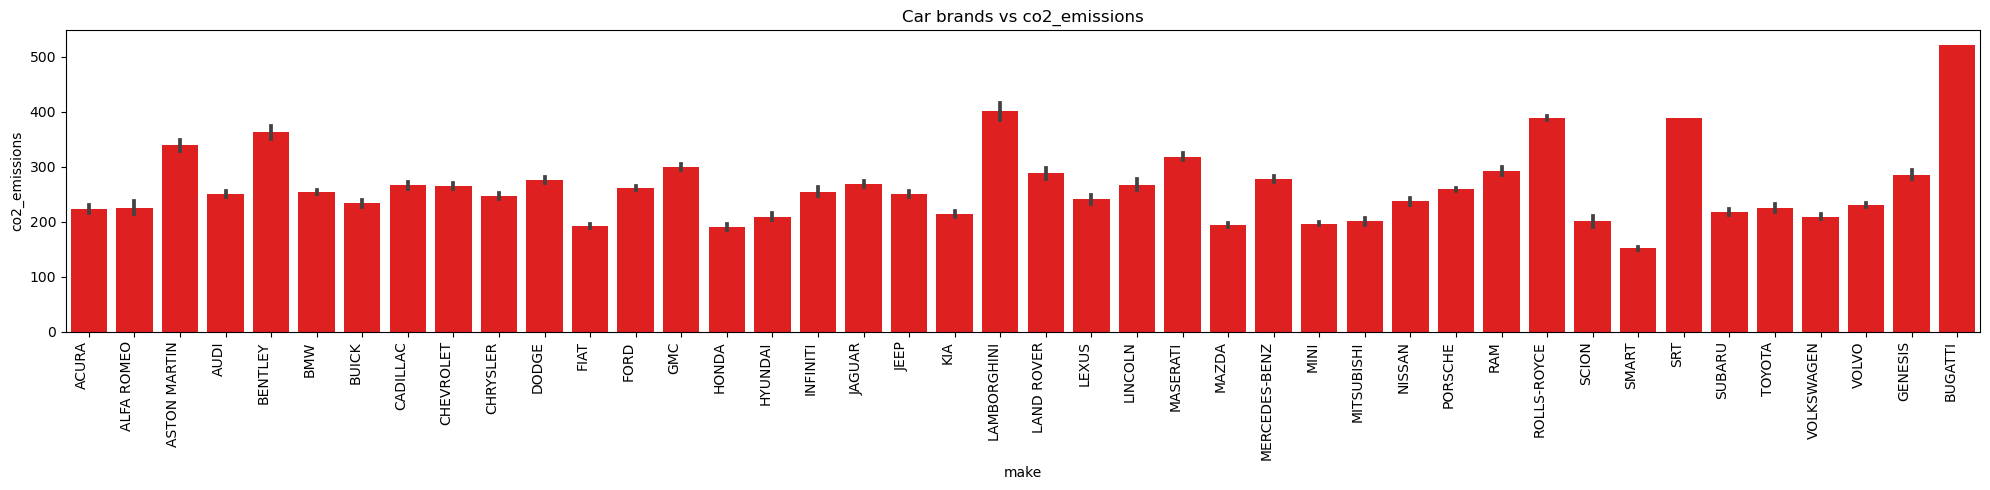

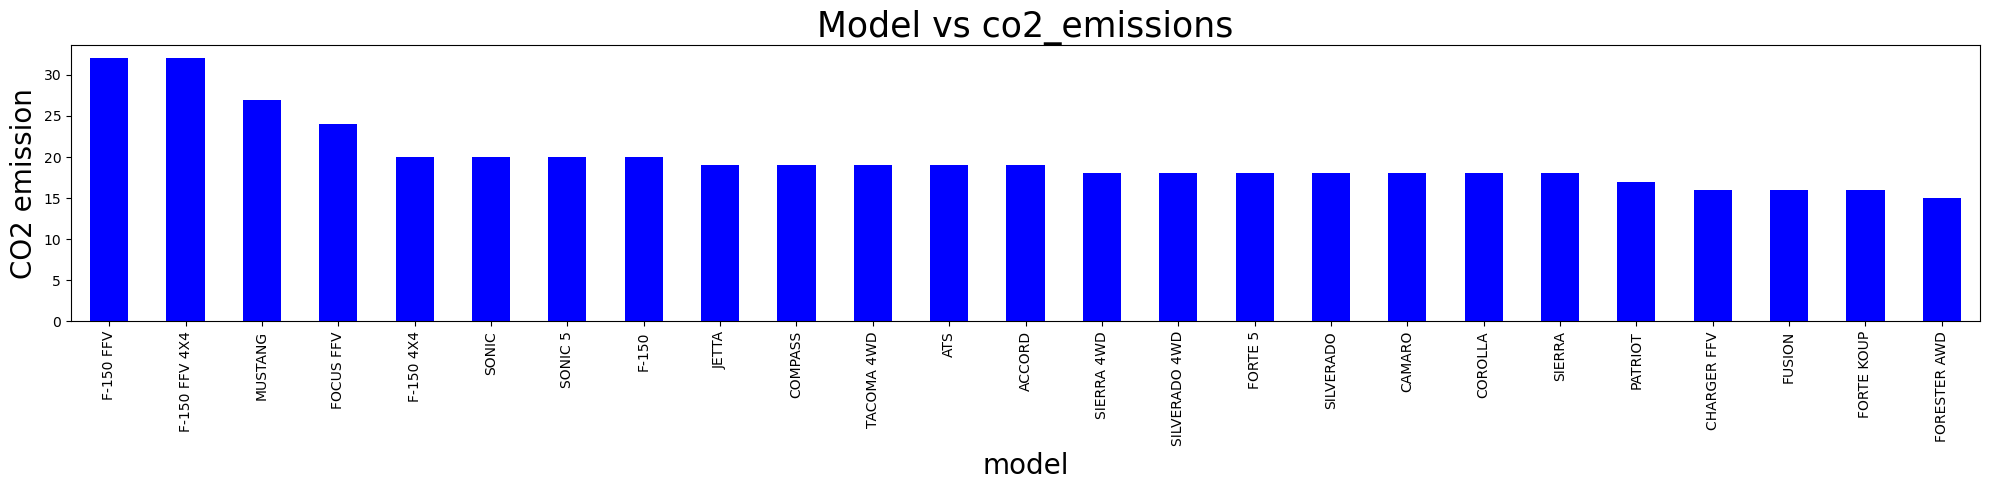

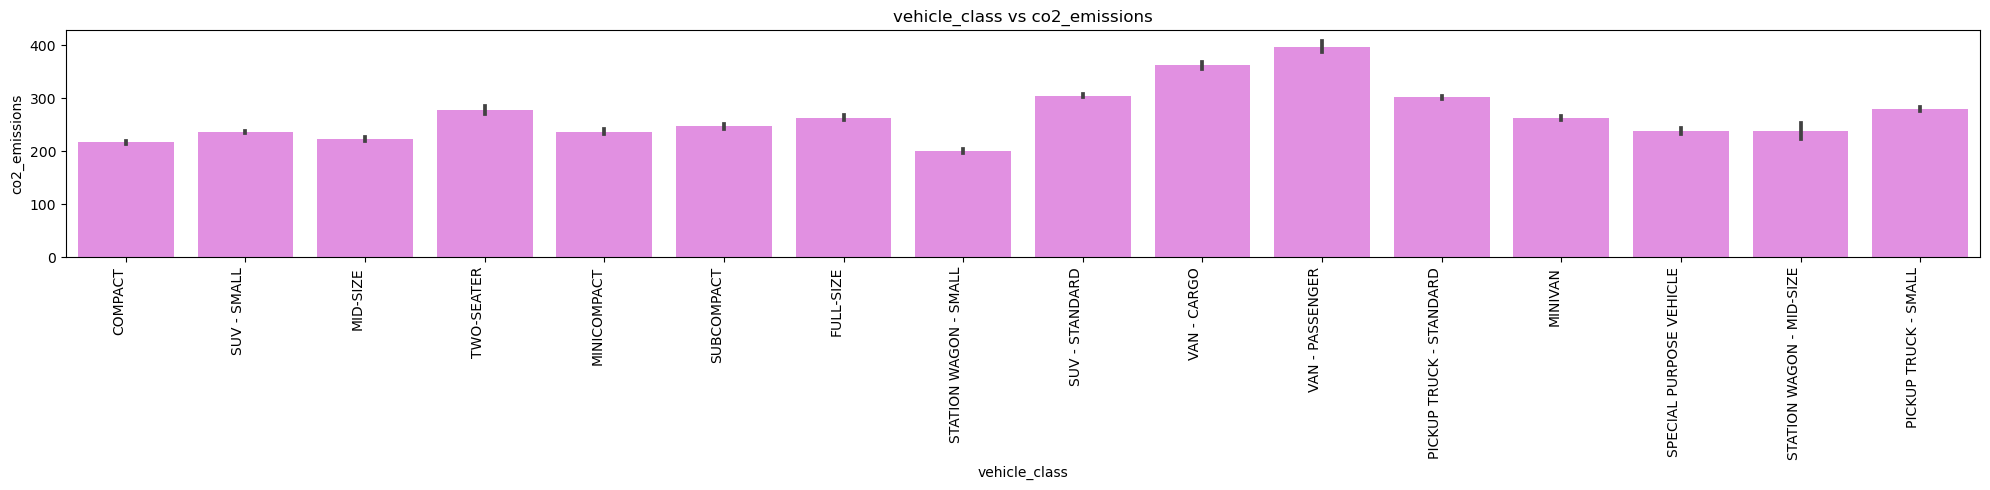

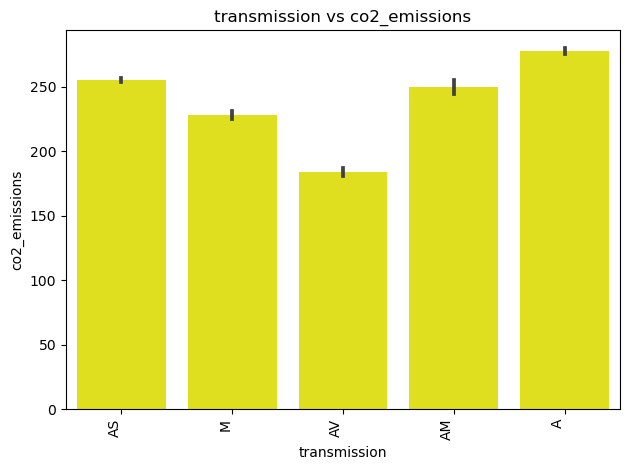

TypeError: 'int' object is not iterable

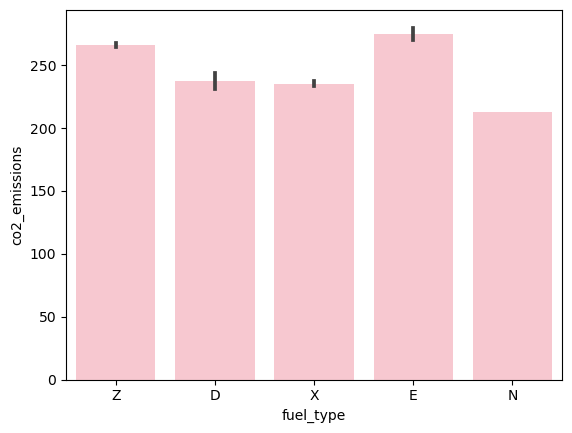

In [29]:
plt.figure(figsize=(20,5))
ax=sns.barplot(x="make",y="co2_emissions",data=df2,color='red')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')
plt.title("Car brands vs co2_emissions")
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,5))
plt.title("Model vs co2_emissions", fontsize=25)
plt.xlabel('Car brands', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
df2.groupby('model')[('co2_emissions')].count().sort_values(ascending=False)[:25].plot(kind='bar',color="blue")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,5))
ax=sns.barplot(x="vehicle_class",y="co2_emissions",data=df2,color="violet")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')
plt.title("vehicle_class vs co2_emissions")
plt.tight_layout()
plt.show()

ax=sns.barplot(x="transmission",y="co2_emissions",data=df2,color='yellow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')
plt.title("transmission vs co2_emissions")
plt.tight_layout()
plt.show()

ax=sns.barplot(x="fuel_type",y="co2_emissions",data=df2,color="pink")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right',fontdict=25)
plt.title("fuel_type vs co2_emissions")
plt.tight_layout()
plt.show()

# EDA (Multivariate Analysis)

<Axes: >

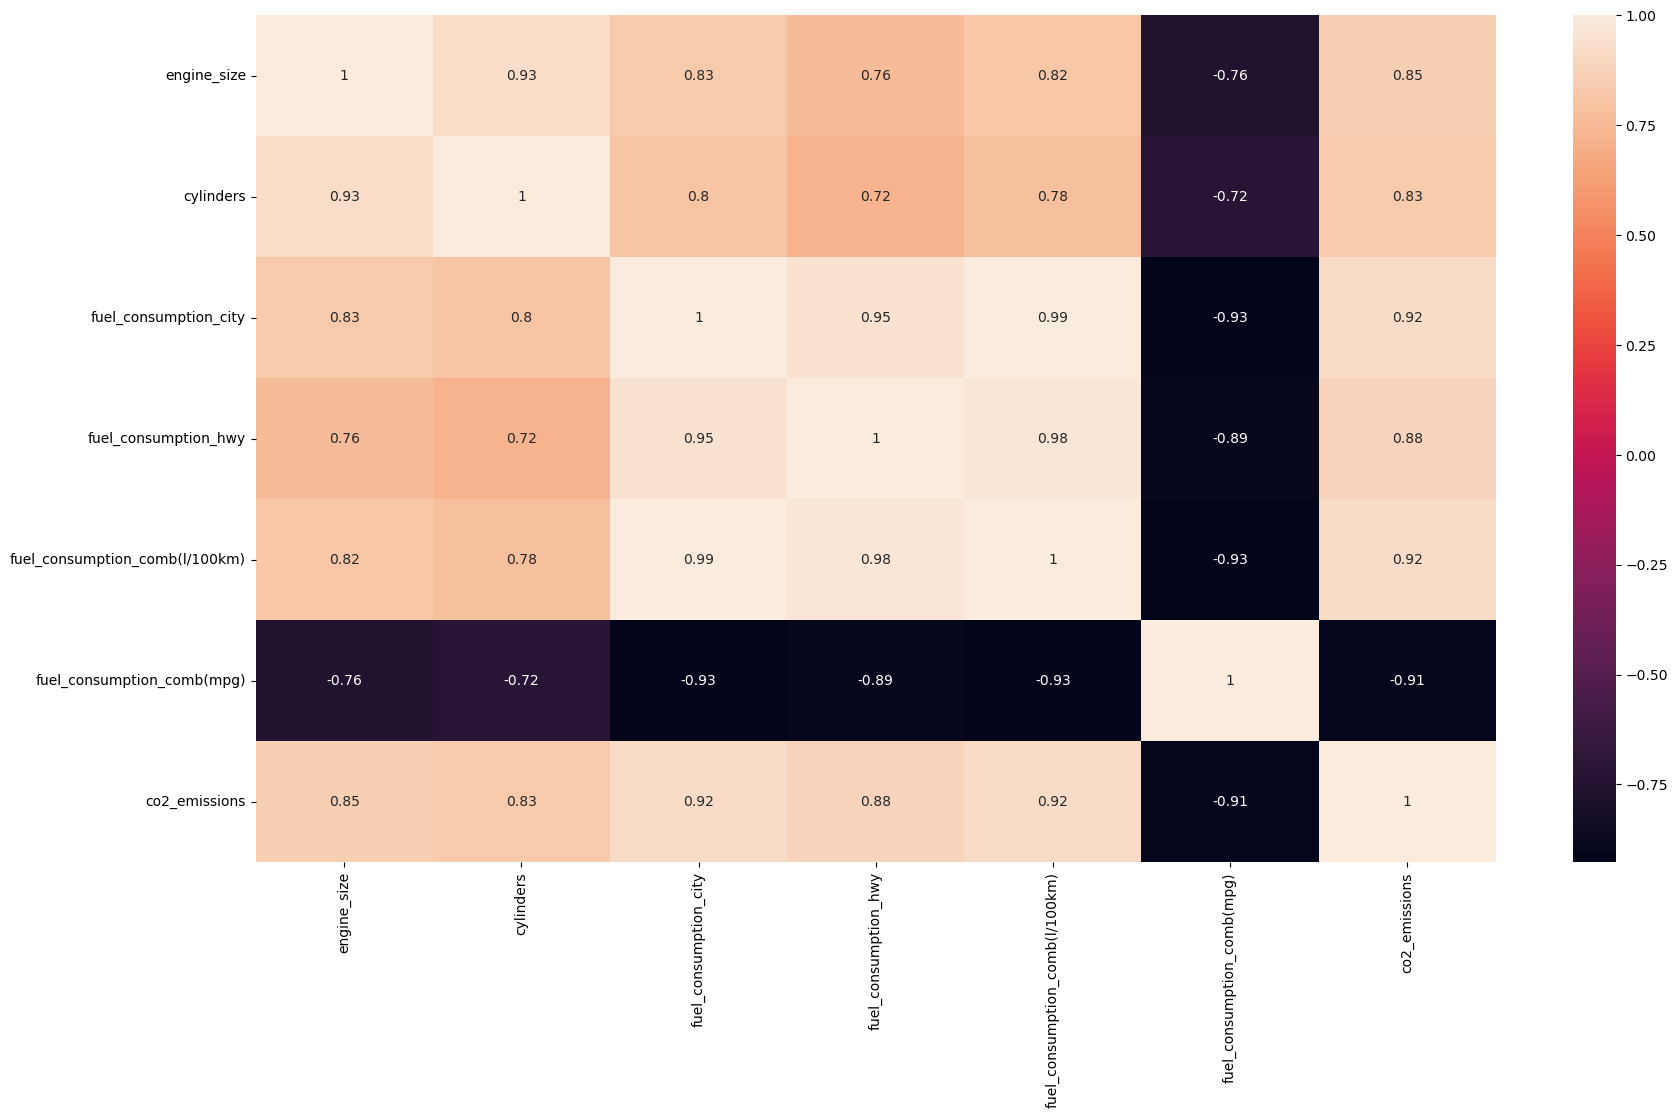

In [30]:
plt.figure(figsize=(20,11))
sns.heatmap(df2.corr(), annot=True)

# Handling Outliers

In [31]:
def impute_outliers_IQR(df1):
    q1=df1.quantile(0.25)
    q3=df1.quantile(0.75)
    IQR=q3-q1
    upper = df1[~(df1>(q3+1.5*IQR))].max()
    lower = df1[~(df1<(q1-1.5*IQR))].min()
    df1= np.where(df1 > upper,df1.mean(),np.where(df1< lower,df1.mean(),df1))
    return df1

In [32]:
df1.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

In [33]:
df2['engine_size']=impute_outliers_IQR(df2["engine_size"])

df2['cylinders']=impute_outliers_IQR(df2["cylinders"])

df2['fuel_consumption_city']=impute_outliers_IQR(df2["fuel_consumption_city"])

df2['fuel_consumption_hwy']=impute_outliers_IQR(df2["fuel_consumption_hwy"])

df2['fuel_consumption_comb(l/100km)']=impute_outliers_IQR(df2["fuel_consumption_comb(l/100km)"])

df2['fuel_consumption_comb(mpg)']=impute_outliers_IQR(df2["fuel_consumption_comb(mpg)"])

df2['co2_emissions']=impute_outliers_IQR(df2["co2_emissions"])



In [34]:
df2

make        model   vehicle_class  engine_size  cylinders transmission  \
0     ACURA          ILX         COMPACT          2.0        4.0           AS   
1     ACURA          ILX         COMPACT          2.4        4.0            M   
2     ACURA   ILX HYBRID         COMPACT          1.5        4.0           AV   
3     ACURA      MDX 4WD     SUV - SMALL          3.5        6.0           AS   
4     ACURA      RDX AWD     SUV - SMALL          3.5        6.0           AS   
...     ...          ...             ...          ...        ...          ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL          2.0        4.0           AS   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL          2.0        4.0           AS   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL          2.0        4.0           AS   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD          2.0        4.0           AS   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD          2.0        4.0           AS   

     fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0            Z                    9.9                   6.7   
1            Z                   11.2                   7.7   
2            Z                    6.0                   5.8   
3            Z                   12.7                   9.1   
4            Z                   12.1                   8.7   
...        ...                    ...                   ...   
7380         Z                   10.7                   7.7   
7381         Z                   11.2                   8.3   
7382         Z                   11.7                   8.6   
7383         Z                   11.2                   8.3   
7384         Z                   12.2                   8.7   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
0                                8.5                   33.000000   
1                                9.6                   29.000000   
2                                5.9                   27.481652   
3                               11.1                   25.000000   
4                               10.6                   27.000000   
...                              ...                         ...   
7380                             9.4                   30.000000   
7381                             9.9                   29.000000   
7382                            10.3                   27.000000   
7383                             9.9                   29.000000   
7384                            10.7                   26.000000   

      co2_emissions  
0             196.0  
1             221.0  
2             136.0  
3             255.0  
4             244.0  
...             ...  
7380          219.0  
7381          232.0  
7382          240.0  
7383          232.0  
7384          248.0  

[7385 rows x 12 columns]

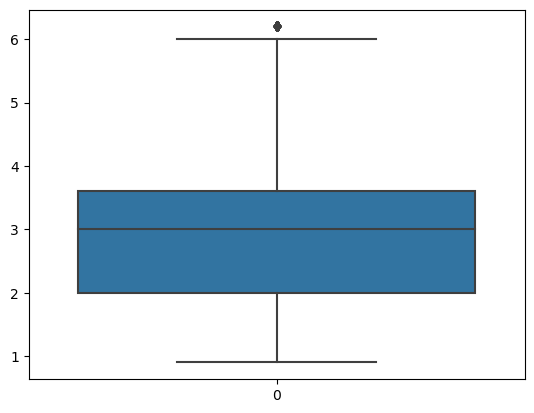

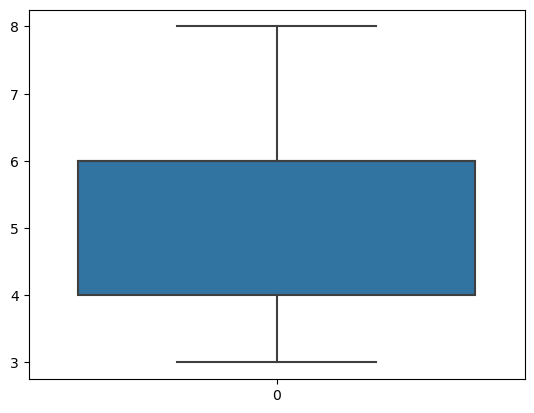

In [35]:
# again checking for outliers present or not
sns.boxplot(df2["engine_size"])
plt.show()

sns.boxplot(df2["cylinders"])
plt.show()

# Handling duplicates

In [36]:
df2[df2.duplicated()].shape

(1131, 12)

In [37]:
data=df2.drop_duplicates()

In [38]:
data[data.duplicated()].shape

(0, 12)

In [39]:
data.dtypes

make                               object
model                              object
vehicle_class                      object
engine_size                       float64
cylinders                         float64
transmission                       object
fuel_type                          object
fuel_consumption_city             float64
fuel_consumption_hwy              float64
fuel_consumption_comb(l/100km)    float64
fuel_consumption_comb(mpg)        float64
co2_emissions                     float64
dtype: object

## EDA for categorical data

In [40]:
datan = data.select_dtypes('object')
datan

make        model   vehicle_class transmission fuel_type
0     ACURA          ILX         COMPACT           AS         Z
1     ACURA          ILX         COMPACT            M         Z
2     ACURA   ILX HYBRID         COMPACT           AV         Z
3     ACURA      MDX 4WD     SUV - SMALL           AS         Z
4     ACURA      RDX AWD     SUV - SMALL           AS         Z
...     ...          ...             ...          ...       ...
7380  VOLVO  XC40 T5 AWD     SUV - SMALL           AS         Z
7381  VOLVO  XC60 T5 AWD     SUV - SMALL           AS         Z
7382  VOLVO  XC60 T6 AWD     SUV - SMALL           AS         Z
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD           AS         Z
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD           AS         Z

[6254 rows x 5 columns]

In [41]:
import pandas as pd
import plotly.express as px

# Assuming you have already loaded the dataset into a pandas DataFrame 'df'
# and you want to visualize all categorical columns

categorical_columns = ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']

# Bar Chart for each categorical column
for column in categorical_columns:
    fig = px.bar(datan[column].value_counts(), x=datan[column].value_counts().index, y=datan[column].value_counts().values,
                 labels={'x': column, 'y': 'Count'}, title=f"Bar Chart for {column}")
    fig.show()




### 1. From the bar graphs, we can see that the "model" class is not discrete but continous.
### 2. It means there are various categories in the same and so will give rise to sparse matrix.
### 3. All the other bargraphs are clean and we can use frequency encoding for eliminating the the sub-categories which are in minority.

In [42]:
 fig = px.pie(datan['vehicle_class'].value_counts(), values=datan['vehicle_class'].value_counts().values,
                 names=datan['vehicle_class'].value_counts().index)
fig.show()


### 1. We can drop the classes with percentage less than 2% of the representation

In [43]:
fig = px.pie(datan['transmission'].value_counts(), values=datan['transmission'].value_counts().values,
                 names=datan['transmission'].value_counts().index)
fig.show()


### 1. There is a proportionate presence of every category, the highest share being of "AS" transmission. We need to use all the transmission mechanisms
### 2. We cannot drop any certain type as there are no minorities present

In [44]:
fig = px.pie(datan['fuel_type'].value_counts(), values=datan['fuel_type'].value_counts().values,
                 names=datan['fuel_type'].value_counts().index, title=f"Pie Chart for {column}")
fig.show()


### 1. There are few cars who use "D" as the fuel type
### 2. More than 90% is taken up by X and Z

# Chi-square Test to find association between the categorical variables

### 1. Ho: There is no association between the two categories
### 2. Ha: There is associatio between the two categories

### If p<0.05, we reject the null hypothesis
### If p> 0.05, we fail to reject the null hypothesis

In [45]:
from scipy.stats import chi2_contingency
column_names = datan.columns
num_columns = len(column_names)

for i in range(num_columns):
    for j in range(i + 1, num_columns):
        contingency_table = pd.crosstab(datan[column_names[i]], data[column_names[j]])
        chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
        
        print(f"Chi-square test between {column_names[i]} and {column_names[j]}:")
        print("Chi-square statistic:", chi2_stat)
        print("P-value:", p_val)




Chi-square test between make and model:
Chi-square statistic: 256414.00000000003
P-value: 0.0
Chi-square test between make and vehicle_class:
Chi-square statistic: 12506.468420194255
P-value: 0.0
Chi-square test between make and transmission:
Chi-square statistic: 7880.982208225672
P-value: 0.0
Chi-square test between make and fuel_type:
Chi-square statistic: 5229.286621433962
P-value: 0.0
Chi-square test between model and vehicle_class:
Chi-square statistic: 92224.4370872844
P-value: 0.0
Chi-square test between model and transmission:
Chi-square statistic: 16943.011846896763
P-value: 0.0
Chi-square test between model and fuel_type:
Chi-square statistic: 16313.948347253568
P-value: 0.0
Chi-square test between vehicle_class and transmission:
Chi-square statistic: 2686.478687125382
P-value: 0.0
Chi-square test between vehicle_class and fuel_type:
Chi-square statistic: 2261.7764386458666
P-value: 0.0
Chi-square test between transmission and fuel_type:
Chi-square statistic: 1041.8725770942

### 1. From the Chi-square analysis we can see that the p-value for all the categories is less than 0.05
### 2. This indicates that there is a greater correlation between the categories

In [46]:
datan.head(20)

make         model vehicle_class transmission fuel_type
0          ACURA           ILX       COMPACT           AS         Z
1          ACURA           ILX       COMPACT            M         Z
2          ACURA    ILX HYBRID       COMPACT           AV         Z
3          ACURA       MDX 4WD   SUV - SMALL           AS         Z
4          ACURA       RDX AWD   SUV - SMALL           AS         Z
5          ACURA           RLX      MID-SIZE           AS         Z
6          ACURA            TL      MID-SIZE           AS         Z
7          ACURA        TL AWD      MID-SIZE           AS         Z
8          ACURA        TL AWD      MID-SIZE            M         Z
9          ACURA           TSX       COMPACT           AS         Z
10         ACURA           TSX       COMPACT            M         Z
11         ACURA           TSX       COMPACT           AS         Z
12    ALFA ROMEO            4C    TWO-SEATER           AM         Z
13  ASTON MARTIN           DB9   MINICOMPACT            A         Z
14  ASTON MARTIN        RAPIDE    SUBCOMPACT            A         Z
15  ASTON MARTIN    V8 VANTAGE    TWO-SEATER           AM         Z
16  ASTON MARTIN    V8 VANTAGE    TWO-SEATER            M         Z
17  ASTON MARTIN  V8 VANTAGE S    TWO-SEATER           AM         Z
18  ASTON MARTIN  V8 VANTAGE S    TWO-SEATER            M         Z
19  ASTON MARTIN      VANQUISH   MINICOMPACT            A         Z

## We combine Make and Model as they both are highly associated and also they are dependent on each other.

In [47]:
df2['make_model']=df2['make']+"_"+df2['model']
df

make        model   vehicle_class  engine_size  cylinders transmission  \
0     ACURA          ILX         COMPACT          2.0          4           AS   
1     ACURA          ILX         COMPACT          2.4          4            M   
2     ACURA   ILX HYBRID         COMPACT          1.5          4           AV   
3     ACURA      MDX 4WD     SUV - SMALL          3.5          6           AS   
4     ACURA      RDX AWD     SUV - SMALL          3.5          6           AS   
...     ...          ...             ...          ...        ...          ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL          2.0          4           AS   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL          2.0          4           AS   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL          2.0          4           AS   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD          2.0          4           AS   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD          2.0          4           AS   

     fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0            Z                    9.9                   6.7   
1            Z                   11.2                   7.7   
2            Z                    6.0                   5.8   
3            Z                   12.7                   9.1   
4            Z                   12.1                   8.7   
...        ...                    ...                   ...   
7380         Z                   10.7                   7.7   
7381         Z                   11.2                   8.3   
7382         Z                   11.7                   8.6   
7383         Z                   11.2                   8.3   
7384         Z                   12.2                   8.7   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
0                                8.5                          33   
1                                9.6                          29   
2                                5.9                          48   
3                               11.1                          25   
4                               10.6                          27   
...                              ...                         ...   
7380                             9.4                          30   
7381                             9.9                          29   
7382                            10.3                          27   
7383                             9.9                          29   
7384                            10.7                          26   

      co2_emissions  
0               196  
1               221  
2               136  
3               255  
4               244  
...             ...  
7380            219  
7381            232  
7382            240  
7383            232  
7384            248  

[7384 rows x 12 columns]

In [48]:
df_2=df2.drop_duplicates()

In [219]:
new_df=df_2.drop(['make','model'], axis=1)

## Outlier Detection for Categorical Data

In [220]:
# List of categorical columns for which you want to calculate frequency encoding
categorical_columns = ['make_model','vehicle_class', 'transmission','fuel_type']

# Calculate the frequency of each category in the categorical columns
for col in categorical_columns:
    freq_encoding = new_df[col].value_counts(normalize=True).to_dict()
    new_df[col + '_freq_encoding'] = 100*new_df[col].map(freq_encoding)

# Display the updated DataFrame
new_df

vehicle_class  engine_size  cylinders transmission fuel_type  \
0            COMPACT          2.0        4.0           AS         Z   
1            COMPACT          2.4        4.0            M         Z   
2            COMPACT          1.5        4.0           AV         Z   
3        SUV - SMALL          3.5        6.0           AS         Z   
4        SUV - SMALL          3.5        6.0           AS         Z   
...              ...          ...        ...          ...       ...   
7380     SUV - SMALL          2.0        4.0           AS         Z   
7381     SUV - SMALL          2.0        4.0           AS         Z   
7382     SUV - SMALL          2.0        4.0           AS         Z   
7383  SUV - STANDARD          2.0        4.0           AS         Z   
7384  SUV - STANDARD          2.0        4.0           AS         Z   

      fuel_consumption_city  fuel_consumption_hwy  \
0                       9.9                   6.7   
1                      11.2                   7.7   
2                       6.0                   5.8   
3                      12.7                   9.1   
4                      12.1                   8.7   
...                     ...                   ...   
7380                   10.7                   7.7   
7381                   11.2                   8.3   
7382                   11.7                   8.6   
7383                   11.2                   8.3   
7384                   12.2                   8.7   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
0                                8.5                   33.000000   
1                                9.6                   29.000000   
2                                5.9                   27.481652   
3                               11.1                   25.000000   
4                               10.6                   27.000000   
...                              ...                         ...   
7380                             9.4                   30.000000   
7381                             9.9                   29.000000   
7382                            10.3                   27.000000   
7383                             9.9                   29.000000   
7384                            10.7                   26.000000   

      co2_emissions         make_model  make_model_freq_encoding  \
0             196.0          ACURA_ILX                  0.111928   
1             221.0          ACURA_ILX                  0.111928   
2             136.0   ACURA_ILX HYBRID                  0.031980   
3             255.0      ACURA_MDX 4WD                  0.015990   
4             244.0      ACURA_RDX AWD                  0.063959   
...             ...                ...                       ...   
7380          219.0  VOLVO_XC40 T5 AWD                  0.031980   
7381          232.0  VOLVO_XC60 T5 AWD                  0.095939   
7382          240.0  VOLVO_XC60 T6 AWD                  0.095939   
7383          232.0  VOLVO_XC90 T5 AWD                  0.063959   
7384          248.0  VOLVO_XC90 T6 AWD                  0.079949   

      vehicle_class_freq_encoding  transmission_freq_encoding  \
0                       14.422769                   43.476175   
1                       14.422769                   16.293572   
2                       14.422769                    7.323313   
3                       16.053726                   43.476175   
4                       16.053726                   43.476175   
...                           ...                         ...   
7380                    16.053726                   43.476175   
7381                    16.053726                   43.476175   
7382                    16.053726                   43.476175   
7383                     9.753758                   43.476175   
7384                     9.753758                   43.476175   

      fuel_type_freq_encoding  
0                   44.131756  
1                   44.131756  
2     

In [221]:
new_df['make_model_freq_encoding'].value_counts()

0.031980    1062
0.063959     768
0.015990     704
0.047969     699
0.095939     654
0.079949     535
0.127918     408
0.143908     270
0.159898     260
0.111928     161
0.255836     128
0.207867      91
0.191877      84
0.239846      75
0.287816      72
0.175887      55
0.223857      42
0.271826      34
0.511673      32
0.495683      31
0.415734      26
0.383754      24
0.319795      20
0.303806      19
Name: make_model_freq_encoding, dtype: int64

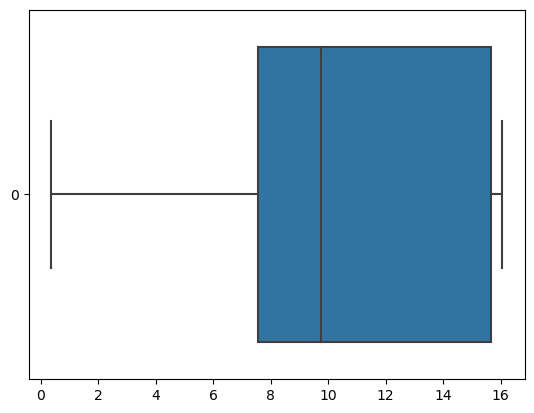

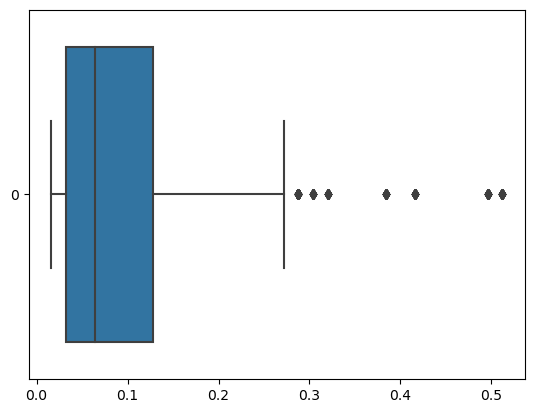

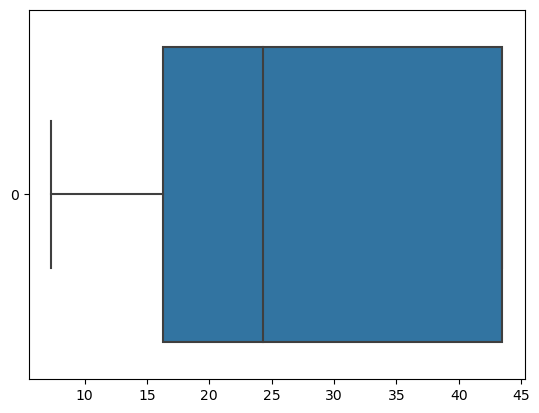

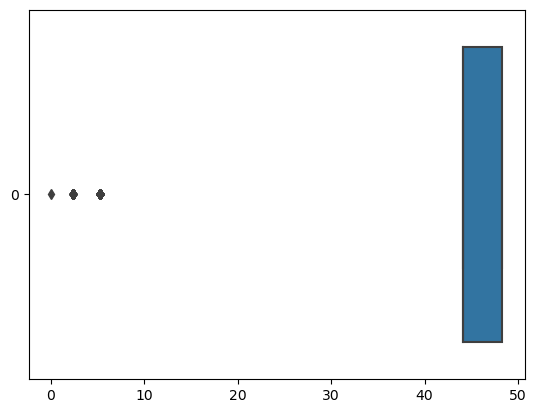

In [222]:
sns.boxplot(new_df.vehicle_class_freq_encoding, orient='h')
plt.show()

sns.boxplot(new_df.make_model_freq_encoding, orient='h')
plt.show()


sns.boxplot(new_df.transmission_freq_encoding, orient='h')
plt.show()

sns.boxplot(new_df.fuel_type_freq_encoding, orient='h')
plt.show()


In [223]:
new_df['make_model_freq_encoding'].value_counts()

0.031980    1062
0.063959     768
0.015990     704
0.047969     699
0.095939     654
0.079949     535
0.127918     408
0.143908     270
0.159898     260
0.111928     161
0.255836     128
0.207867      91
0.191877      84
0.239846      75
0.287816      72
0.175887      55
0.223857      42
0.271826      34
0.511673      32
0.495683      31
0.415734      26
0.383754      24
0.319795      20
0.303806      19
Name: make_model_freq_encoding, dtype: int64

### Treating the outliers

In [224]:
new_df['make_model_freq_encoding']=impute_outliers_IQR(new_df["make_model_freq_encoding"])


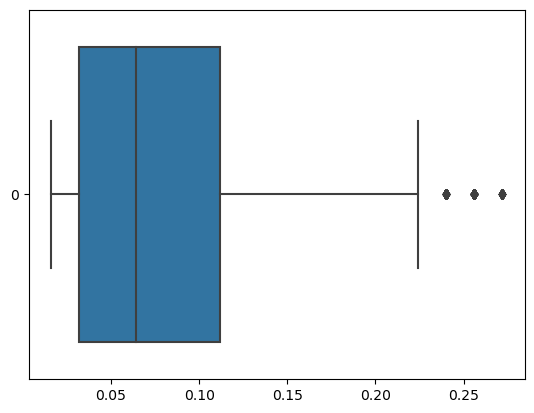

In [225]:
sns.boxplot(new_df.make_model_freq_encoding, orient='h')
plt.show()

In [226]:
new_df

vehicle_class  engine_size  cylinders transmission fuel_type  \
0            COMPACT          2.0        4.0           AS         Z   
1            COMPACT          2.4        4.0            M         Z   
2            COMPACT          1.5        4.0           AV         Z   
3        SUV - SMALL          3.5        6.0           AS         Z   
4        SUV - SMALL          3.5        6.0           AS         Z   
...              ...          ...        ...          ...       ...   
7380     SUV - SMALL          2.0        4.0           AS         Z   
7381     SUV - SMALL          2.0        4.0           AS         Z   
7382     SUV - SMALL          2.0        4.0           AS         Z   
7383  SUV - STANDARD          2.0        4.0           AS         Z   
7384  SUV - STANDARD          2.0        4.0           AS         Z   

      fuel_consumption_city  fuel_consumption_hwy  \
0                       9.9                   6.7   
1                      11.2                   7.7   
2                       6.0                   5.8   
3                      12.7                   9.1   
4                      12.1                   8.7   
...                     ...                   ...   
7380                   10.7                   7.7   
7381                   11.2                   8.3   
7382                   11.7                   8.6   
7383                   11.2                   8.3   
7384                   12.2                   8.7   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
0                                8.5                   33.000000   
1                                9.6                   29.000000   
2                                5.9                   27.481652   
3                               11.1                   25.000000   
4                               10.6                   27.000000   
...                              ...                         ...   
7380                             9.4                   30.000000   
7381                             9.9                   29.000000   
7382                            10.3                   27.000000   
7383                             9.9                   29.000000   
7384                            10.7                   26.000000   

      co2_emissions         make_model  make_model_freq_encoding  \
0             196.0          ACURA_ILX                  0.111928   
1             221.0          ACURA_ILX                  0.111928   
2             136.0   ACURA_ILX HYBRID                  0.031980   
3             255.0      ACURA_MDX 4WD                  0.015990   
4             244.0      ACURA_RDX AWD                  0.063959   
...             ...                ...                       ...   
7380          219.0  VOLVO_XC40 T5 AWD                  0.031980   
7381          232.0  VOLVO_XC60 T5 AWD                  0.095939   
7382          240.0  VOLVO_XC60 T6 AWD                  0.095939   
7383          232.0  VOLVO_XC90 T5 AWD                  0.063959   
7384          248.0  VOLVO_XC90 T6 AWD                  0.079949   

      vehicle_class_freq_encoding  transmission_freq_encoding  \
0                       14.422769                   43.476175   
1                       14.422769                   16.293572   
2                       14.422769                    7.323313   
3                       16.053726                   43.476175   
4                       16.053726                   43.476175   
...                           ...                         ...   
7380                    16.053726                   43.476175   
7381                    16.053726                   43.476175   
7382                    16.053726                   43.476175   
7383                     9.753758                   43.476175   
7384                     9.753758                   43.476175   

      fuel_type_freq_encoding  
0                   44.131756  
1                   44.131756  
2     

In [197]:
pd.get_dummies(new_df, columns=['transmission','fuel_type'])

vehicle_class  engine_size  cylinders  fuel_consumption_city  \
0            COMPACT          2.0        4.0                    9.9   
1            COMPACT          2.4        4.0                   11.2   
2            COMPACT          1.5        4.0                    6.0   
3        SUV - SMALL          3.5        6.0                   12.7   
4        SUV - SMALL          3.5        6.0                   12.1   
...              ...          ...        ...                    ...   
7380     SUV - SMALL          2.0        4.0                   10.7   
7381     SUV - SMALL          2.0        4.0                   11.2   
7382     SUV - SMALL          2.0        4.0                   11.7   
7383  SUV - STANDARD          2.0        4.0                   11.2   
7384  SUV - STANDARD          2.0        4.0                   12.2   

      fuel_consumption_hwy  fuel_consumption_comb(l/100km)  \
0                      6.7                             8.5   
1                      7.7                             9.6   
2                      5.8                             5.9   
3                      9.1                            11.1   
4                      8.7                            10.6   
...                    ...                             ...   
7380                   7.7                             9.4   
7381                   8.3                             9.9   
7382                   8.6                            10.3   
7383                   8.3                             9.9   
7384                   8.7                            10.7   

      fuel_consumption_comb(mpg)  co2_emissions         make_model  \
0                      33.000000          196.0          ACURA_ILX   
1                      29.000000          221.0          ACURA_ILX   
2                      27.481652          136.0   ACURA_ILX HYBRID   
3                      25.000000          255.0      ACURA_MDX 4WD   
4                      27.000000          244.0      ACURA_RDX AWD   
...                          ...            ...                ...   
7380                   30.000000          219.0  VOLVO_XC40 T5 AWD   
7381                   29.000000          232.0  VOLVO_XC60 T5 AWD   
7382                   27.000000          240.0  VOLVO_XC60 T6 AWD   
7383                   29.000000          232.0  VOLVO_XC90 T5 AWD   
7384                   26.000000          248.0  VOLVO_XC90 T6 AWD   

      make_model_freq_encoding  ...  transmission_A  transmission_AM  \
0                     0.111928  ...               0                0   
1                     0.111928  ...               0                0   
2                     0.031980  ...               0                0   
3                     0.015990  ...               0                0   
4                     0.063959  ...               0                0   
...                        ...  ...             ...              ...   
7380                  0.031980  ...               0                0   
7381                  0.095939  ...               0                0   
7382                  0.095939  ...               0                0   
7383                  0.063959  ...               0                0   
7384                  0.079949  ...               0                0   

      transmission_AS  transmission_AV  transmission_M  fuel_type_D  \
0                   1                0               0            0   
1                   0                0               1            0   
2                   0                1               0            0   
3                   1                0               0            0   
4                   1                0               0            0   
...               ...              ...             ...          ...   
7380                1                0               0            0   
7381                1                0               0            0   
7382                1                0               0          

In [200]:
new_df['vehicle_class'].value_counts()

SUV - SMALL                 1004
MID-SIZE                     981
COMPACT                      902
SUV - STANDARD               610
SUBCOMPACT                   532
FULL-SIZE                    508
PICKUP TRUCK - STANDARD      472
TWO-SEATER                   377
MINICOMPACT                  274
STATION WAGON - SMALL        212
PICKUP TRUCK - SMALL         133
SPECIAL PURPOSE VEHICLE       65
MINIVAN                       61
VAN - PASSENGER               56
STATION WAGON - MID-SIZE      45
VAN - CARGO                   22
Name: vehicle_class, dtype: int64

In [227]:
new_df.drop('make_model_freq_encoding', axis=1, inplace=True)

In [228]:
category_mapping = {
    'SUV - SMALL': 'Mid-Range',
    'MID-SIZE': 'Mid-Range',
    'SUV - STANDARD': 'Top-End',
    'SUBCOMPACT': 'Mid-Range',
    'FULL-SIZE': 'Top-End',
    'PICKUP TRUCK - STANDARD': 'Top-End',
    'TWO-SEATER': 'Top-End',
    'MINICOMPACT': 'Low-end',
    'STATION WAGON - SMALL': 'Low-end',
    'PICKUP TRUCK - SMALL': 'Mid-Range',
    'COMPACT': 'Low-end',
    'SPECIAL PURPOSE VEHICLE': 'Top-End',
    'MINIVAN': 'Low-end',
    'VAN-PASSENGER': 'Low-end',
    'STATION WAGON - MID-SIZE': 'Low-end',
    'VAN-CARGO': 'Mid-Range',
    # Add more mappings as needed
}

In [229]:
new_df['vehicle_class'] = new_df['vehicle_class'].replace(category_mapping)


In [213]:
pd.get_dummies(new_df, columns=['vehicle_class'])

engine_size  cylinders transmission fuel_type  fuel_consumption_city  \
0             2.0        4.0           AS         Z                    9.9   
1             2.4        4.0            M         Z                   11.2   
2             1.5        4.0           AV         Z                    6.0   
3             3.5        6.0           AS         Z                   12.7   
4             3.5        6.0           AS         Z                   12.1   
...           ...        ...          ...       ...                    ...   
7380          2.0        4.0           AS         Z                   10.7   
7381          2.0        4.0           AS         Z                   11.2   
7382          2.0        4.0           AS         Z                   11.7   
7383          2.0        4.0           AS         Z                   11.2   
7384          2.0        4.0           AS         Z                   12.2   

      fuel_consumption_hwy  fuel_consumption_comb(l/100km)  \
0                      6.7                             8.5   
1                      7.7                             9.6   
2                      5.8                             5.9   
3                      9.1                            11.1   
4                      8.7                            10.6   
...                    ...                             ...   
7380                   7.7                             9.4   
7381                   8.3                             9.9   
7382                   8.6                            10.3   
7383                   8.3                             9.9   
7384                   8.7                            10.7   

      fuel_consumption_comb(mpg)  co2_emissions         make_model  \
0                      33.000000          196.0          ACURA_ILX   
1                      29.000000          221.0          ACURA_ILX   
2                      27.481652          136.0   ACURA_ILX HYBRID   
3                      25.000000          255.0      ACURA_MDX 4WD   
4                      27.000000          244.0      ACURA_RDX AWD   
...                          ...            ...                ...   
7380                   30.000000          219.0  VOLVO_XC40 T5 AWD   
7381                   29.000000          232.0  VOLVO_XC60 T5 AWD   
7382                   27.000000          240.0  VOLVO_XC60 T6 AWD   
7383                   29.000000          232.0  VOLVO_XC90 T5 AWD   
7384                   26.000000          248.0  VOLVO_XC90 T6 AWD   

      vehicle_class_freq_encoding  transmission_freq_encoding  \
0                       14.422769                   43.476175   
1                       14.422769                   16.293572   
2                       14.422769                    7.323313   
3                       16.053726                   43.476175   
4                       16.053726                   43.476175   
...                           ...                         ...   
7380                    16.053726                   43.476175   
7381                    16.053726                   43.476175   
7382                    16.053726                   43.476175   
7383                     9.753758                   43.476175   
7384                     9.753758                   43.476175   

      fuel_type_freq_encoding vehicle_classs  vehicle_class_Low-end  \
0                   44.131756        COMPACT                      1   
1                   44.131756        COMPACT                      1   
2                   44.131756        COMPACT                      1   
3                   44.131756      Mid-Range                      0   
4                   44.131756      Mid-Range                      0   
...                       ...            ...                    ...   
7380                44.131756      Mid-Range                      0   
7381                44.131756      Mid-Range                      0   
7382                44.131756      Mid-Range                   

In [209]:
new_df.columns

Index(['vehicle_class', 'engine_size', 'cylinders', 'transmission',
       'fuel_type', 'fuel_consumption_city', 'fuel_consumption_hwy',
       'fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)',
       'co2_emissions', 'make_model', 'vehicle_class_freq_encoding',
       'transmission_freq_encoding', 'fuel_type_freq_encoding',
       'vehicle_classs'],
      dtype='object')

In [231]:
new_df.drop(['vehicle_class_freq_encoding','transmission_freq_encoding', 'fuel_type_freq_encoding','make_model'], axis=1, inplace=True)

In [234]:
new_data=pd.get_dummies(new_df, columns=['transmission','fuel_type','vehicle_class'])

In [235]:
new_data.drop(['vehicle_class_VAN - CARGO', 'vehicle_class_VAN - PASSENGER'], axis=1, inplace=True)

In [237]:
new_data.shape

(6254, 20)

In [57]:
threshold=0.2000
condition = new_df['make_model_freq_encoding'] >= threshold


In [58]:
rows_to_drop = new_df[condition]


In [59]:
final_df=new_df.drop(rows_to_drop.index)


In [60]:
final_df.drop(['make_model_freq_encoding','vehicle_class_freq_encoding','transmission_freq_encoding','fuel_type_freq_encoding'], axis=1, inplace=True)

In [194]:
final_df

vehicle_class  engine_size  cylinders transmission fuel_type  \
0            COMPACT          2.0        4.0           AS         Z   
1            COMPACT          2.4        4.0            M         Z   
2            COMPACT          1.5        4.0           AV         Z   
3        SUV - SMALL          3.5        6.0           AS         Z   
4        SUV - SMALL          3.5        6.0           AS         Z   
...              ...          ...        ...          ...       ...   
7380     SUV - SMALL          2.0        4.0           AS         Z   
7381     SUV - SMALL          2.0        4.0           AS         Z   
7382     SUV - SMALL          2.0        4.0           AS         Z   
7383  SUV - STANDARD          2.0        4.0           AS         Z   
7384  SUV - STANDARD          2.0        4.0           AS         Z   

      fuel_consumption_city  fuel_consumption_hwy  \
0                       9.9                   6.7   
1                      11.2                   7.7   
2                       6.0                   5.8   
3                      12.7                   9.1   
4                      12.1                   8.7   
...                     ...                   ...   
7380                   10.7                   7.7   
7381                   11.2                   8.3   
7382                   11.7                   8.6   
7383                   11.2                   8.3   
7384                   12.2                   8.7   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
0                                8.5                   33.000000   
1                                9.6                   29.000000   
2                                5.9                   27.481652   
3                               11.1                   25.000000   
4                               10.6                   27.000000   
...                              ...                         ...   
7380                             9.4                   30.000000   
7381                             9.9                   29.000000   
7382                            10.3                   27.000000   
7383                             9.9                   29.000000   
7384                            10.7                   26.000000   

      co2_emissions         make_model  
0             196.0          ACURA_ILX  
1             221.0          ACURA_ILX  
2             136.0   ACURA_ILX HYBRID  
3             255.0      ACURA_MDX 4WD  
4             244.0      ACURA_RDX AWD  
...             ...                ...  
7380          219.0  VOLVO_XC40 T5 AWD  
7381          232.0  VOLVO_XC60 T5 AWD  
7382          240.0  VOLVO_XC60 T6 AWD  
7383          232.0  VOLVO_XC90 T5 AWD  
7384          248.0  VOLVO_XC90 T6 AWD  

[5884 rows x 11 columns]

In [196]:
final_df['vehicle_class'].value_counts()

SUV - SMALL                 962
MID-SIZE                    877
COMPACT                     840
SUV - STANDARD              610
SUBCOMPACT                  525
FULL-SIZE                   474
PICKUP TRUCK - STANDARD     408
TWO-SEATER                  377
MINICOMPACT                 274
STATION WAGON - SMALL       199
PICKUP TRUCK - SMALL         89
SPECIAL PURPOSE VEHICLE      65
MINIVAN                      61
VAN - PASSENGER              56
STATION WAGON - MID-SIZE     45
VAN - CARGO                  22
Name: vehicle_class, dtype: int64

## One Hot Encoding

In [61]:
final_data=pd.get_dummies(final_df,columns=['make_model','vehicle_class', 'transmission','fuel_type'],drop_first=True)

In [62]:
final_data

engine_size  cylinders  fuel_consumption_city  fuel_consumption_hwy  \
0             2.0        4.0                    9.9                   6.7   
1             2.4        4.0                   11.2                   7.7   
2             1.5        4.0                    6.0                   5.8   
3             3.5        6.0                   12.7                   9.1   
4             3.5        6.0                   12.1                   8.7   
...           ...        ...                    ...                   ...   
7380          2.0        4.0                   10.7                   7.7   
7381          2.0        4.0                   11.2                   8.3   
7382          2.0        4.0                   11.7                   8.6   
7383          2.0        4.0                   11.2                   8.3   
7384          2.0        4.0                   12.2                   8.7   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
0                                8.5                   33.000000   
1                                9.6                   29.000000   
2                                5.9                   27.481652   
3                               11.1                   25.000000   
4                               10.6                   27.000000   
...                              ...                         ...   
7380                             9.4                   30.000000   
7381                             9.9                   29.000000   
7382                            10.3                   27.000000   
7383                             9.9                   29.000000   
7384                            10.7                   26.000000   

      co2_emissions  make_model_ACURA_ILX HYBRID  make_model_ACURA_MDX 4WD  \
0             196.0                            0                         0   
1             221.0                            0                         0   
2             136.0                            1                         0   
3             255.0                            0                         1   
4             244.0                            0                         0   
...             ...                          ...                       ...   
7380          219.0                            0                         0   
7381          232.0                            0                         0   
7382          240.0                            0                         0   
7383          232.0                            0                         0   
7384          248.0                            0                         0   

      make_model_ACURA_MDX HYBRID AWD  ...  vehicle_class_VAN - CARGO  \
0                                   0  ...                          0   
1                                   0  ...                          0   
2                                   0  ...                          0   
3                                   0  ...                          0   
4                                   0  ...                          0   
...                               ...  ...                        ...   
7380                                0  ...                          0   
7381                                0  ...                          0   
7382                                0  ...                          0   
7383                                0  ...                          0   
7384                                0  ...                          0   

      vehicle_class_VAN - PASSENGER  transmission_AM  transmission_AS  \
0                                 0                0                1   
1                                 0                0                0   
2                                 0                0                0   
3                                 0                0                1   
4                                 0                0                1   
...         

## Checking Multicollinearity

In [63]:
df_3=final_data.select_dtypes(['float','int'])

In [64]:
df_3

engine_size  cylinders  fuel_consumption_city  fuel_consumption_hwy  \
0             2.0        4.0                    9.9                   6.7   
1             2.4        4.0                   11.2                   7.7   
2             1.5        4.0                    6.0                   5.8   
3             3.5        6.0                   12.7                   9.1   
4             3.5        6.0                   12.1                   8.7   
...           ...        ...                    ...                   ...   
7380          2.0        4.0                   10.7                   7.7   
7381          2.0        4.0                   11.2                   8.3   
7382          2.0        4.0                   11.7                   8.6   
7383          2.0        4.0                   11.2                   8.3   
7384          2.0        4.0                   12.2                   8.7   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
0                                8.5                   33.000000   
1                                9.6                   29.000000   
2                                5.9                   27.481652   
3                               11.1                   25.000000   
4                               10.6                   27.000000   
...                              ...                         ...   
7380                             9.4                   30.000000   
7381                             9.9                   29.000000   
7382                            10.3                   27.000000   
7383                             9.9                   29.000000   
7384                            10.7                   26.000000   

      co2_emissions  
0             196.0  
1             221.0  
2             136.0  
3             255.0  
4             244.0  
...             ...  
7380          219.0  
7381          232.0  
7382          240.0  
7383          232.0  
7384          248.0  

[5884 rows x 7 columns]

In [65]:
df_3.rename(columns={"fuel_consumption_comb(l/100km)":"fuel_consumption_comb","fuel_consumption_comb(mpg)":"fuel_consumption_comb_mpg"}, inplace=True)

In [66]:
df_3

engine_size  cylinders  fuel_consumption_city  fuel_consumption_hwy  \
0             2.0        4.0                    9.9                   6.7   
1             2.4        4.0                   11.2                   7.7   
2             1.5        4.0                    6.0                   5.8   
3             3.5        6.0                   12.7                   9.1   
4             3.5        6.0                   12.1                   8.7   
...           ...        ...                    ...                   ...   
7380          2.0        4.0                   10.7                   7.7   
7381          2.0        4.0                   11.2                   8.3   
7382          2.0        4.0                   11.7                   8.6   
7383          2.0        4.0                   11.2                   8.3   
7384          2.0        4.0                   12.2                   8.7   

      fuel_consumption_comb  fuel_consumption_comb_mpg  co2_emissions  
0                       8.5                  33.000000          196.0  
1                       9.6                  29.000000          221.0  
2                       5.9                  27.481652          136.0  
3                      11.1                  25.000000          255.0  
4                      10.6                  27.000000          244.0  
...                     ...                        ...            ...  
7380                    9.4                  30.000000          219.0  
7381                    9.9                  29.000000          232.0  
7382                   10.3                  27.000000          240.0  
7383                    9.9                  29.000000          232.0  
7384                   10.7                  26.000000          248.0  

[5884 rows x 7 columns]

In [67]:
import statsmodels.formula.api as smf 
model = smf.ols('co2_emissions~engine_size+cylinders+fuel_consumption_city+fuel_consumption_hwy+fuel_consumption_comb+fuel_consumption_comb_mpg',data=df_3).fit()

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_emissions   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     6711.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:39:11   Log-Likelihood:                -25952.
No. Observations:                5884   AIC:                         5.192e+04
Df Residuals:                    5877   BIC:                         5.196e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    86.5029      5.185     16.685      0.000      76.339      96.667
engine_size                   5.1457      0.513     10.029      0.000       4.140       6.152
cylinders                     3.2885      0.397      8.287      0.000       2.511       4.066
fuel_consumption_city         4.6617      0.534      8.731      0.000       3.615       5.708
fuel_consumption_hwy          7.7150      0.435     17.736      0.000       6.862       8.568
fuel_consumption_comb         3.0124      0.785      3.838      0.000       1.474       4.551
fuel_consumption_comb_mpg    -1.1033      0.097    -11.371      0.000      -1.294      -0.913
==============================================================================
Omnibus:                     2827.385   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26933.321
Skew:                          -2.077   Prob(JB):                         0.00
Kurtosis:                      12.623   Cond. No.                         670.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
model.params

Intercept                    86.502928
engine_size                   5.145749
cylinders                     3.288462
fuel_consumption_city         4.661676
fuel_consumption_hwy          7.714994
fuel_consumption_comb         3.012439
fuel_consumption_comb_mpg    -1.103301
dtype: float64

In [70]:
model.pvalues

Intercept                    4.241615e-61
engine_size                  1.760119e-23
cylinders                    1.424648e-16
fuel_consumption_city        3.232597e-18
fuel_consumption_hwy         1.325866e-68
fuel_consumption_comb        1.253764e-04
fuel_consumption_comb_mpg    1.190650e-29
dtype: float64

In [71]:
model.tvalues

Intercept                    16.684600
engine_size                  10.028660
cylinders                     8.287066
fuel_consumption_city         8.731477
fuel_consumption_hwy         17.735835
fuel_consumption_comb         3.837933
fuel_consumption_comb_mpg   -11.370818
dtype: float64

## Variable Inflation Factor

In [72]:
vif_data = pd.DataFrame()
df_4=df_3.drop('co2_emissions',axis=1)
vif_data["feature"] = df_4.columns

In [73]:
vif_data

feature
0                engine_size
1                  cylinders
2      fuel_consumption_city
3       fuel_consumption_hwy
4      fuel_consumption_comb
5  fuel_consumption_comb_mpg

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_4.values, i)
                          for i in range(len(df_4.columns))]

In [75]:
vif_data

feature          VIF
0                engine_size    43.763129
1                  cylinders    71.111463
2      fuel_consumption_city   691.847481
3       fuel_consumption_hwy   209.600923
4      fuel_consumption_comb  1131.847706
5  fuel_consumption_comb_mpg     8.595469

## Performing PCA and Preparing the Dataset 

In [175]:
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from seaborn import regplot
from sklearn.decomposition import PCA


In [77]:
X=final_data.drop('co2_emissions', axis=1)
y=final_data['co2_emissions']

In [78]:
# Define a range of n_components for PCA
n_components_range = range(1, 100)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [80]:
# Set the number of folds for cross-validation
k_folds = 5

# Initialize KFold cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

In [81]:
# Initialize a linear regression model
model_lin= LinearRegression()

# Initialize variables to store results
best_n_components = None
best_mse = float('inf')

In [82]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Scaling

In [83]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [84]:
n_components_range = range(1, 100)

# Set the number of folds for cross-validation
k_folds = 5

# Initialize KFold cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize a linear regression model
linear_model = LinearRegression()

# Initialize variables to store results
best_n_components = None
best_mse = float('inf')

# Perform train-test split and cross-validation for each n_components
for n_components in n_components_range:
    # Initialize PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    fold = 0
    for train_index, val_index in kf.split(X_pca):
        X_train, X_val = X_pca[train_index], X_pca[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    
    # Train the model on the training set
    linear_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = linear_model.predict(X_test)
    
    # Calculate the mean squared error on the test set
    mse = mean_squared_error(y_test, y_pred)
    
    # Perform k-fold cross-validation and get the mean squared error (MSE)
    mse_scores = cross_val_score(linear_model, X_pca, y, cv=kf, scoring='neg_mean_squared_error')
    mean_mse = -np.mean(mse_scores)
    
    # Keep track of the best n_components based on mean cross-validated MSE
    if mean_mse < best_mse:
        best_n_components = n_components
        best_mse = mean_mse

print(f"Best n_components: {best_n_components}")
print(f"Best Mean Cross-Validated MSE: {best_mse:.2f}")

Best n_components: 40
Best Mean Cross-Validated MSE: 239.98


In [85]:
X_val

array([[-1.92256785e+00,  6.81808744e-01, -2.65517766e-01, ...,
         2.68817764e-03,  2.37384732e-04,  5.45471084e-04],
       [ 1.79173942e-01,  2.44592337e-01, -6.56785153e-01, ...,
         5.25403055e-03,  1.79132527e-03, -4.71677391e-04],
       [ 1.48390067e+00,  3.33640295e-01, -1.17579683e+00, ...,
        -5.47406626e-03, -6.85329081e-04, -1.88936957e-03],
       ...,
       [ 2.02450959e+00,  6.76232503e-01,  1.30648486e+00, ...,
         4.50294585e-03, -9.01909169e-03,  1.28341420e-03],
       [ 4.28214991e+00,  5.04453036e-01,  1.09300132e+00, ...,
         4.80661539e-03,  5.21039138e-03,  2.93781689e-03],
       [ 6.25308889e+00, -1.83993350e-01,  4.84585074e-01, ...,
         3.28471621e-03,  4.69419721e-03, -5.57752957e-03]])

In [86]:
y_val

3       255.0
4       244.0
5       230.0
9       212.0
16      354.0
        ...  
7357    381.0
7358    155.0
7360    234.0
7371    221.0
7373    208.0
Name: co2_emissions, Length: 1176, dtype: float64

In [87]:
#X_val

In [88]:
#y_val

In [89]:
linear_model.score(X_test,y_test)

0.9269097609868202

In [90]:
mse_scores

array([-233.7661704 , -314.42113141, -240.45430182, -222.69259115,
       -196.34904007])

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression_model(modeln, X_train, y_train, X_test, y_test):


    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    return mae, mse, rmse, r2

In [92]:
 # Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


In [93]:
mae

7.577480199052728

In [94]:
mse

233.766170401754

In [95]:
rmse

15.289413670960506

In [96]:
r2

0.9269097609868202

## 2. Model 2: Decision Tree Regression

In [176]:
df_3

engine_size  cylinders  fuel_consumption_city  fuel_consumption_hwy  \
0             2.0        4.0                    9.9                   6.7   
1             2.4        4.0                   11.2                   7.7   
2             1.5        4.0                    6.0                   5.8   
3             3.5        6.0                   12.7                   9.1   
4             3.5        6.0                   12.1                   8.7   
...           ...        ...                    ...                   ...   
7380          2.0        4.0                   10.7                   7.7   
7381          2.0        4.0                   11.2                   8.3   
7382          2.0        4.0                   11.7                   8.6   
7383          2.0        4.0                   11.2                   8.3   
7384          2.0        4.0                   12.2                   8.7   

      fuel_consumption_comb  fuel_consumption_comb_mpg  co2_emissions  
0                       8.5                  33.000000          196.0  
1                       9.6                  29.000000          221.0  
2                       5.9                  27.481652          136.0  
3                      11.1                  25.000000          255.0  
4                      10.6                  27.000000          244.0  
...                     ...                        ...            ...  
7380                    9.4                  30.000000          219.0  
7381                    9.9                  29.000000          232.0  
7382                   10.3                  27.000000          240.0  
7383                    9.9                  29.000000          232.0  
7384                   10.7                  26.000000          248.0  

[5884 rows x 7 columns]

In [249]:
X=df_3.drop('co2_emissions', axis=1)
y=df_3['co2_emissions']

In [250]:
regression = DecisionTreeRegressor(random_state=42)


In [251]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)


In [252]:
scaler=StandardScaler()
X_train2=scaler.fit_transform(X_train2)
X_test2=scaler.transform(X_test2)

In [253]:
regression.fit(X_train2, y_train2)


DecisionTreeRegressor(random_state=42)

In [254]:
X_test2

array([[-0.08012706,  0.34510837, -0.48788671, -0.37012644, -0.44980918,
         0.33419215],
       [ 0.04709622,  0.09381941,  2.38079062,  1.83292128,  2.21357932,
        -1.55774954],
       [ 0.39675844,  0.34510837,  0.45783109,  0.3642228 ,  0.43798698,
        -0.45411688],
       ...,
       [-0.31856981,  0.34510837, -0.17264745,  0.0495017 , -0.10241068,
         0.01886854],
       [ 0.39675844,  0.34510837,  0.11106789, -0.16031237,  0.01338882,
        -0.13879327],
       [-0.87493623, -0.96039213, -0.45636279,  0.10195521, -0.25681002,
         0.17653035]])

In [255]:
y_pred2 = regression.predict(X_test2)
y_pred2

array([226.33333333, 387.        , 278.5       , ..., 249.        ,
       253.4       , 240.        ])

In [256]:
regression.score(X_test2,y_test2)

0.9637331273599272

In [257]:
mae2 = mean_absolute_error(y_test2, y_pred2)
mse2 = mean_squared_error(y_test2, y_pred2)
rmse2= mean_squared_error(y_test2, y_pred2, squared=False)
r22 = r2_score(y_test2, y_pred2)


In [258]:
mae2

3.24716139726516

In [259]:
mse2

115.99316193218645

In [260]:
rmse2

10.770012160261773

In [261]:
r22

0.9637331273599272

## 3. SVM Regressor

In [109]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_pca, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train3=scaler.fit_transform(X_train3)
X_test3=scaler.transform(X_test3)

In [110]:
# Loading the support vector regression model
svr_regression=svm.SVR()

#Fitting the model to our train dataset
svr_regression.fit(X_train3,y_train3)

SVR()

In [111]:
y_pred3 = svr_regression.predict(X_test3)
y_pred3

array([231.69922659, 319.54013562, 244.04150624, ..., 251.77271013,
       256.78809459, 238.66827741])

In [112]:
svr_regression.score(X_test3,y_test3)

0.7159202733293151

In [113]:
mae3 = mean_absolute_error(y_test3, y_pred3)
mse3 = mean_squared_error(y_test3, y_pred3)
rmse3= mean_squared_error(y_test3, y_pred3, squared=False)
r23 = r2_score(y_test3, y_pred3)


In [114]:
mae3

19.270237417272845

In [115]:
mse3

908.5786377112294

In [116]:
rmse3

30.142638200914487

In [117]:
r23

0.7159202733293151

## 4. Random Forest Regressor

In [118]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_pca, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train4=scaler.fit_transform(X_train4)
X_test4=scaler.transform(X_test4)

In [119]:
# Loading the random forest regression model
rf_reg=RandomForestRegressor()

#Fitting the model to our train dataset
rf_reg.fit(X_train4,y_train4)

RandomForestRegressor()

In [120]:
y_pred4 = rf_reg.predict(X_test4)
y_pred4

array([225.27      , 388.37333333, 276.87      , ..., 246.52      ,
       255.51166667, 238.08333333])

In [121]:
rf_reg.score(X_test4,y_test4)

0.9851588017798923

In [122]:
mae4 = mean_absolute_error(y_test4, y_pred4)
mse4 = mean_squared_error(y_test4, y_pred4)
rmse4= mean_squared_error(y_test4, y_pred4, squared=False)
r24 = r2_score(y_test4, y_pred4)

In [123]:
mse4

47.466941125507624

In [124]:
mae4

2.83449313698438

In [125]:
result={'Model':["Linear Regression",'Decision Tree Regressor','Support Vector Machine Regressor','Random Forest Regressor'],'MAE':[mae, mae2, mae3, mae4], 'MSE':[mse,mse2,mse3,mse4],"RMSE":[rmse,rmse2,rmse3,rmse4],'Accuracy':[r2,r22,r23,r24]}

In [126]:
pd.DataFrame(result)

Model        MAE         MSE       RMSE  \
0                 Linear Regression   7.577480  233.766170  15.289414   
1           Decision Tree Regressor   3.262407   76.181809   8.728219   
2  Support Vector Machine Regressor  19.270237  908.578638  30.142638   
3           Random Forest Regressor   2.834493   47.466941   6.889626   

   Accuracy  
0  0.926910  
1  0.976181  
2  0.715920  
3  0.985159

The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable.

R Squared & Adjusted R Squared are used for explaining how well the independent variables in the linear regression model explains the variability in the dependent variable. R Squared value always increases with the addition of the independent variables which might lead to the addition of the redundant variables in our model. However, the adjusted R-squared solves this problem.

Adjusted R squared takes into account the number of predictor variables, and it is used to determine the number of independent variables in our model. The value of Adjusted R squared decreases if the increase in the R square by the additional variable isn’t significant enough.

For comparing the accuracy among different linear regression models, RMSE is a better choice than R Squared.

Both RMSE and R- Squared quantifies how well a linear regression model fits a dataset. The RMSE tells how well a regression model can predict the value of a response variable in absolute terms while R- Squared tells how well the predictor variables can explain the variation in the response variable.

In [135]:
pip install --upgrade scikit-learn

                                              0.0/9.2 MB ? eta -:--:--
     -                                        0.3/9.2 MB 5.2 MB/s eta 0:00:02
     --                                       0.6/9.2 MB 6.0 MB/s eta 0:00:02
     ---                                      0.8/9.2 MB 5.9 MB/s eta 0:00:02
     ----                                     1.1/9.2 MB 6.0 MB/s eta 0:00:02
     -----                                    1.3/9.2 MB 5.6 MB/s eta 0:00:02
     ------                                   1.5/9.2 MB 5.4 MB/s eta 0:00:02
     -------                                  1.7/9.2 MB 5.2 MB/s eta 0:00:02
     --------                                 1.9/9.2 MB 5.0 MB/s eta 0:00:02
     --------                                 2.1/9.2 MB 4.9 MB/s eta 0:00:02
     ---------                                2.3/9.2 MB 4.8 MB/s eta 0:00:02
     ----------                               2.4/9.2 MB 4.7 MB/s eta 0:00:02
     -----------                              2.6/9.2 MB 4.6 MB/s eta 0

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\Anaconda\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [128]:
import pandas
import sklearn
import streamlit

In [129]:
import pickle

In [262]:
filename= 'trained_model.sav'
pickle.dump(regression, open(filename, 'wb'))

In [263]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [132]:
y_pred2 = dt_regressor_model.predict(X_test2)
y_pred2

array([224.33333333, 383.75409836, 273.        , ..., 248.10526316,
       255.6       , 237.33333333])

In [133]:
df_3.columns

Index(['engine_size', 'cylinders', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb',
       'fuel_consumption_comb_mpg', 'co2_emissions'],
      dtype='object')

In [134]:
'engine_size', 'cylinders', 'fuel_consumption_city','fuel_consumption_hwy', 'fuel_consumption_comb','fuel_consumption_comb_mpg'

('engine_size',
 'cylinders',
 'fuel_consumption_city',
 'fuel_consumption_hwy',
 'fuel_consumption_comb',
 'fuel_consumption_comb_mpg')